# 

In [ ]:
# !pip install kaggle api

## DOWNLOAD KAGGLE DATASET

In [ ]:
!kaggle datasets download -d adarshsng/lending-club-loan-data-csv

## UNZIP DATASET

In [ ]:
!unzip lending-club-loan-data-csv

Archive:  lending-club-loan-data-csv.zip
replace LCDataDictionary.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## VIEW THE DATASET

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
df=pd.read_csv('loan.csv') 

/var/folders/qz/_17r_zwd7490nsmxy50m59lm0000gn/T/ipykernel_22695/3058984317.py:1: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('loan.csv')


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


### List all columns

In [4]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [6]:
df['loan_status'].value_counts()

loan_status
Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: count, dtype: int64

Loan status column is expected to be the target column so we need to map the values for our model.

In [12]:
mapped_loan_status = {
    'Fully paid': 1,
    'Current': 1,
    'Charged Off': 0,
    'Late (31-120 days)': 0,
    'In Grace Period': 1,
    'Late (16-30 days)': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Does not meet the credit policy. Status:Charged Off': 0,
    'Default': 0
}

df['loan_status_new'] = df['loan_status'].map(mapped_loan_status)
df.drop('loan_status', axis=1, inplace=True)

df['loan_status_new'].value_counts()

loan_status_new
1.0    928647
0.0    290069
Name: count, dtype: int64

We need to check the percentage of missing Target columns, this informs us about the percentage of missing columns that we may have to drop due to incomplete or missing features 

In [17]:
# df['loan_status_new'].isnull().sum()

(df['loan_status_new'].isnull().sum()/len(df)) * 100

46.09044760221315

### check status: Shape, empty columns, describe e.t.c

In [13]:
df.shape

(2260668, 145)

In [18]:
# list(df.isnull().sum())
df.isnull().sum()

id                       2260668
member_id                2260668
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
                          ...   
settlement_date          2227612
settlement_amount        2227612
settlement_percentage    2227612
settlement_term          2227612
loan_status_new          1041952
Length: 145, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to loan_status_new
dtypes: float64(106), int64(4), object(35)
memory usage: 2.4+ GB


### Drop Columns with 100% empty i.e NaN

In [20]:
df = df.dropna(axis=1, how='all')

In [21]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status_new
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Drop Rows with 100% empty i.e NaN

In [22]:
#View the number of rows that are completely NaN before dropping them

empty_rows_count = df.isnull().all(axis=1).sum()
print(f"Rows with all values missing: {empty_rows_count}")


Rows with all values missing: 0


In [23]:
#Drop rows with completely NaN
df = df.dropna(how='all')

### Check Percentage of empty columns

In [24]:
(df.isnull().sum()/len(df)) * 100

loan_amnt                 0.000000
funded_amnt               0.000000
funded_amnt_inv           0.000000
term                      0.000000
int_rate                  0.000000
                           ...    
settlement_date          98.537777
settlement_amount        98.537777
settlement_percentage    98.537777
settlement_term          98.537777
loan_status_new          46.090448
Length: 142, dtype: float64

### Drop columns where over 50% are missing 

In [27]:
threshold = 0.5  # 50%
df = df.loc[:, df.isnull().mean() < threshold]

In [28]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent.round(2).sort_values(ascending=False)
list(missing_percent)

[47.28,
 46.09,
 40.25,
 38.32,
 38.31,
 38.31,
 38.31,
 38.31,
 38.31,
 38.31,
 38.31,
 38.31,
 38.31,
 38.31,
 38.31,
 13.07,
 7.39,
 6.8,
 6.5,
 6.15,
 3.36,
 3.33,
 3.31,
 3.25,
 3.12,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 3.11,
 2.59,
 2.59,
 2.21,
 2.21,
 2.21,
 2.21,
 1.03,
 0.11,
 0.08,
 0.08,
 0.06,
 0.01,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 101 entries, loan_amnt to loan_status_new
dtypes: float64(76), int64(4), object(21)
memory usage: 1.7+ GB


### Reduce memory usage before further analysis

In [30]:
# Convert int64 to smaller ints
for col in df.select_dtypes(include=['int64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')

# Convert float64 to smaller floats
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='float')

# Optionally convert object columns with few unique values to category
for col in df.select_dtypes(include=['object']).columns:
    if df[col].nunique() / len(df) < 0.5:
        df[col] = df[col].astype('category')


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 101 entries, loan_amnt to loan_status_new
dtypes: category(21), float32(66), float64(10), int32(3), int8(1)
memory usage: 861.3 MB


In [32]:
# df.describe()

### Analyze missing columns in preparation for Feature Engineering

In [33]:
#First create a copy of dataframe
df_original = df.copy()

In [38]:
#View all columns where anything is missing
cols_with_missing_values = missing_percent[missing_percent > 0].index.tolist()
list((cols_with_missing_values))

['il_util',
 'loan_status_new',
 'mths_since_rcnt_il',
 'all_util',
 'open_acc_6m',
 'inq_last_12m',
 'total_cu_tl',
 'inq_fi',
 'max_bal_bc',
 'open_rv_24m',
 'open_rv_12m',
 'total_bal_il',
 'open_il_12m',
 'open_act_il',
 'open_il_24m',
 'mths_since_recent_inq',
 'emp_title',
 'num_tl_120dpd_2m',
 'emp_length',
 'mo_sin_old_il_acct',
 'bc_util',
 'percent_bc_gt_75',
 'bc_open_to_buy',
 'mths_since_recent_bc',
 'pct_tl_nvr_dlq',
 'tot_cur_bal',
 'num_bc_tl',
 'num_actv_rev_tl',
 'num_actv_bc_tl',
 'tot_coll_amt',
 'total_rev_hi_lim',
 'num_accts_ever_120_pd',
 'num_op_rev_tl',
 'mo_sin_rcnt_tl',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_old_rev_tl_op',
 'avg_cur_bal',
 'num_il_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'total_il_high_credit_limit',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'tot_hi_cred_lim',
 'num_bc_sats',
 'num_sats',
 'mort_acc',
 'total_bc_limit',
 'total_bal_ex_mort',
 'acc_open_past_24mths',
 'title',
 'last_pymnt_d',
 'revol_util',
 'dti',


### Lets check a summary of all missing data in dataframe

In [43]:
def missing_data_summary(df, threshold=0):
    """
    Summarizes missing data, showing count and percentage of missing values for each column.
    Filters columns based on a missing percentage threshold.
    
    Parameters:
        df (pd.DataFrame): The dataframe to analyze.
        threshold (float): The minimum percentage of missing data to include in the summary.
    
    Returns:
        pd.DataFrame: A summary of missing data.
    """
    return (
        pd.DataFrame(df.isnull().sum())
        .reset_index()
        .rename(columns={'index': 'Column', 0: 'mis_count'})
        .query('mis_count > 0')  # Only include columns with missing values
        .assign(Missing_Percentage=lambda x: x['mis_count'] / df.shape[0] * 100)
        .query(f'Missing_Percentage > {threshold}')
        .sort_values('mis_count', ascending=False)
        .reset_index(drop=True)
    )


In [59]:
missing = missing_data_summary(df, 0.00000000000000)


In [60]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(missing)

                        Column  mis_count  Missing_Percentage
0                      il_util    1068850           47.280273
1              loan_status_new    1041952           46.090448
2           mths_since_rcnt_il     909924           40.250227
3                     all_util     866348           38.322655
4                  open_acc_6m     866130           38.313012
5                 inq_last_12m     866130           38.313012
6                  total_cu_tl     866130           38.313012
7                       inq_fi     866129           38.312968
8                   max_bal_bc     866129           38.312968
9                  open_rv_24m     866129           38.312968
10                 open_rv_12m     866129           38.312968
11                total_bal_il     866129           38.312968
12                 open_il_24m     866129           38.312968
13                 open_il_12m     866129           38.312968
14                 open_act_il     866129           38.312968
15      

### Data Cleaning
We can use Model-based imputation i.e Use other features to predict the missing values.

1. KNNImputer (uses nearest neighbours) - Only works for Numerical columns

2. IterativeImputer (uses regression-like models)

3. SimpleImputer(strategy='most_frequent') - works for categorical variables

4. SimpleImputer(strategy='median')- works for Numerical columns


We can also use methods that replaces numerical columsn with 'mean', 'median', or 'mode'. Then we replace categorical with a placefiller e.g. 'Unknown' or replace with the most common item. 

What method we use depends on the use case



In [71]:
#Split Numerical and Categorical columns

numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

### View Categorical features

In [73]:
print(categorical_cols)

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')


In [81]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_status_new
0,2500,2500,2500.0,36 months,13.560000,84.919998,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,2018-12-01,n,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,2001-04-01,1.0,9.0,1.0,4341,10.300000,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,2019-02-01,84.92,2019-02-01,0.0,1,Individual,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.900000,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.000000,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N,1.0
1,30000,30000,30000.0,60 months,18.940001,777.229980,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,2018-12-01,n,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,1987-06-01,0.0,13.0,1.0,12315,24.200001,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,2019-02-01,777.23,2019-02-01,0.0,1,Individual,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.300000,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,4.0,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.000000,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N,1.0
2,5000,5000,5000.0,36 months,17.969999,180.690002,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,2011-04-01,0.0,8.0,0.0,4599,19.100000,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,2019-02-01,180.69,2019-02-01,0.0,1,Individual,0.0,0.0,110299.0,0.0,1.0,0.0,2.0,14.0,7150.0,72.0,0.0,2.0,0.0,35.0,24100.0,1.0,5.0,0.0,4.0,18383.0,13800.0,0.000000,0.0,0.0,87.0,92.0,15.0,14.0,2.0,77.0,14.0,0.0,0.0,3.0,3.0,3.0,4.0,6.0,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.000000,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N,1.0
3,4000,4000,4000.0,36 months,18.940001,146.509995,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,2018-12-01,n,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,2006-02-01,0.0,10.0,0.0,5468,78.099998,13.0,w,3831.93,3831.93,286.71,286.71,168.07,118.64,0.0,0.0,0.0,2019-02-01,146.51,2019-02-01,0.0,1,Individual,0.0,686.0,305049.0,1.0,5.0,3.0,5.0,5.0,30683.0,68.0,0.0,0.0,3761.0,70.0,7000.0,2.0,4.0,3.0,5.0,30505.0,1239.0,75.199997,0.0,0.0,62.0,154.0,64.0,5.0,3.0,64.0,5.0,0.0,1.0,2.0,1.0,2.0,7.0,2.0,3.0,2.0,10.0,0.0,0.0,0.0,3.0,100.000000,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N,1.0
4,30000,30000,30000.0,60 months,16.139999,731.780029,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,2018-12-01,n,debt_consoli

In [76]:
df.select_dtypes(include=['object', 'category']).head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,hardship_flag,disbursement_method,debt_settlement_flag
0,36 months,C,C1,Chef,10+ years,RENT,Not Verified,Dec-2018,n,debt_consolidation,Debt consolidation,109xx,NY,Apr-2001,w,Feb-2019,Feb-2019,Individual,N,Cash,N
1,60 months,D,D2,Postmaster,10+ years,MORTGAGE,Source Verified,Dec-2018,n,debt_consolidation,Debt consolidation,713xx,LA,Jun-1987,w,Feb-2019,Feb-2019,Individual,N,Cash,N
2,36 months,D,D1,Administrative,6 years,MORTGAGE,Source Verified,Dec-2018,n,debt_consolidation,Debt consolidation,490xx,MI,Apr-2011,w,Feb-2019,Feb-2019,Individual,N,Cash,N
3,36 months,D,D2,IT Supervisor,10+ years,MORTGAGE,Source Verified,Dec-2018,n,debt_consolidation,Debt consolidation,985xx,WA,Feb-2006,w,Feb-2019,Feb-2019,Individual,N,Cash,N
4,60 months,C,C4,Mechanic,10+ years,MORTGAGE,Not Verified,Dec-2018,n,debt_consolidation,Debt consolidation,212xx,MD,Dec-2000,w,Feb-2019,Feb-2019,Individual,N,Cash,N


In [87]:
# Drop unnecessary columns
# Drop columns if they exist
columns_to_drop = ['title', 'zip_code', 'emp_title', 'revol_util']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)


In [95]:

# Remove leading/trailing whitespaces from string/object columns
df = df.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)

# Convert date columns to datetime format
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], format='%b-%Y', errors='coerce')

# Convert percentage columns to numeric
# Uncomment if needed
# df['int_rate'] = pd.to_numeric(df['int_rate'].str.strip('%'), errors='coerce')
# df['revol_util'] = pd.to_numeric(df['revol_util'].str.strip('%'), errors='coerce')


# Encode debt_settlement_flag as binary
df['debt_settlement_flag'] = np.where(df['debt_settlement_flag'] == 'Y', 1, 0)

# # Encode term column into binary and drop the original
# df['term_36_months'] = np.where(df['term'] == '36 months', 1, 0)
# df.drop('term', axis=1, inplace=True)

# Clean and convert emp_length
# Ensure emp_length is treated as string, not categorical
df['emp_length'] = df['emp_length'].astype(str)

# Replace 'nan' strings from conversion with empty string
df['emp_length'] = df['emp_length'].replace('nan', '')

# Remove '<' and take first 2 characters, then convert to numeric
df['emp_length'] = pd.to_numeric(
    df['emp_length'].str.replace('<', '', regex=False).str[:2].str.strip(),
    errors='coerce'
)

# # Replace actual NaNs and string 'NaN' with 'N'
# df['hardship_flag'] = df['hardship_flag'].replace('NaN', np.nan)  # convert string 'NaN' to real NaN
# df['hardship_flag'] = df['hardship_flag'].fillna('N')



### Get the counts of unique items for all categorical columns, then sort it

In [96]:
def get_sorted_unique_counts(df):
    # Select columns with categorical data
    object_cols = df.select_dtypes(include=['object', 'category']).columns
    
    # Get the number of unique entries in each categorical column
    object_nunique = {col: df[col].nunique() for col in object_cols}
    
    # Convert to DataFrame and sort by unique counts
    unique_counts = pd.DataFrame(list(object_nunique.items()), columns=['Column', 'Unique Count'])
    unique_counts = unique_counts.sort_values(by='Unique Count').reset_index(drop=True)
    
    return unique_counts

get_sorted_unique_counts(df)

,Column,Unique Count
0,pymnt_plan,2
1,initial_list_status,2
2,application_type,2
3,hardship_flag,2
4,disbursement_method,2
5,verification_status,3
6,home_ownership,6
7,grade,7
8,purpose,14
9,sub_grade,35


In [98]:
(df.isnull().sum()/len(df)) * 100


loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_length                     6.498389
home_ownership                 0.000000
annual_inc                     0.000177
verification_status            0.000000
issue_d                        0.000000
pymnt_plan                     0.000000
purpose                        0.000000
addr_state                     0.000000
dti                            0.075686
delinq_2yrs                    0.001283
earliest_cr_line               0.001283
inq_last_6mths                 0.001327
open_acc                       0.001283
pub_rec                        0.001283
revol_bal                      0.000000
total_acc                      0.001283
initial_list_status            0.000000
out_prncp                      0.000000


### SInce our column "loan_status_new" is the Target variable, we need to drop all empty rows using this.

In [100]:
df = df.dropna(subset=['loan_status_new'])

In [101]:
(df.isnull().sum())/len(df)

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    0.075364
home_ownership                0.000000
annual_inc                    0.000003
verification_status           0.000000
issue_d                       0.000000
pymnt_plan                    0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.001199
delinq_2yrs                   0.000024
earliest_cr_line              0.000024
inq_last_6mths                0.000024
open_acc                      0.000024
pub_rec                       0.000024
revol_bal                     0.000000
total_acc                     0.000024
initial_list_status           0.000000
out_prncp                     0.000000
out_prncp_inv            

Now we have a lot less missing items as they are less than 1% missing. 

### Fill object / categorical columns with 'Unknown'

In [103]:

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = df[col].fillna('Unknown')


### Fill numeric columns with median

In [113]:

num_cols = df.select_dtypes(include=['float64', 'int64', 'float32', 'int32']).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

### Handle dates 
First we have to convert to datetime and use the min as a Placeholder

In [114]:
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

for col in date_cols:
    # Convert to string first if it's categorical
    if pd.api.types.is_categorical_dtype(df[col]):
        df[col] = df[col].astype(str)
    
    # Then convert to datetime
    df[col] = pd.to_datetime(df[col], errors='coerce')
    
    # Use the minimum date as placeholder
    placeholder = df[col].min()
    df[col] = df[col].fillna(placeholder)

In [115]:
#Check status

(df.isnull().sum())/len(df)

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
pymnt_plan                    0.0
purpose                       0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
total_acc                     0.0
initial_list_status           0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prncp               0.0
total_rec_int 

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1218716 entries, 0 to 2260667
Data columns (total 96 columns):
 #   Column                      Non-Null Count    Dtype         
---  ------                      --------------    -----         
 0   loan_amnt                   1218716 non-null  int32         
 1   funded_amnt                 1218716 non-null  int32         
 2   funded_amnt_inv             1218716 non-null  float64       
 3   int_rate                    1218716 non-null  float32       
 4   installment                 1218716 non-null  float32       
 5   grade                       1218716 non-null  category      
 6   sub_grade                   1218716 non-null  category      
 7   emp_length                  1218716 non-null  float64       
 8   home_ownership              1218716 non-null  category      
 9   annual_inc                  1218716 non-null  float64       
 10  verification_status         1218716 non-null  category      
 11  issue_d                     1

In [131]:
# Convert target variable - 'loan_status_new' to categorical variable

df['loan_status_new'] = df['loan_status_new'].astype('category')

## Exploratory  Data Analysis

#### 1️⃣ Target Variable Analysis (loan_status_new)

/var/folders/qz/_17r_zwd7490nsmxy50m59lm0000gn/T/ipykernel_22695/3233923892.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='loan_status_new', data=df, palette=colors)


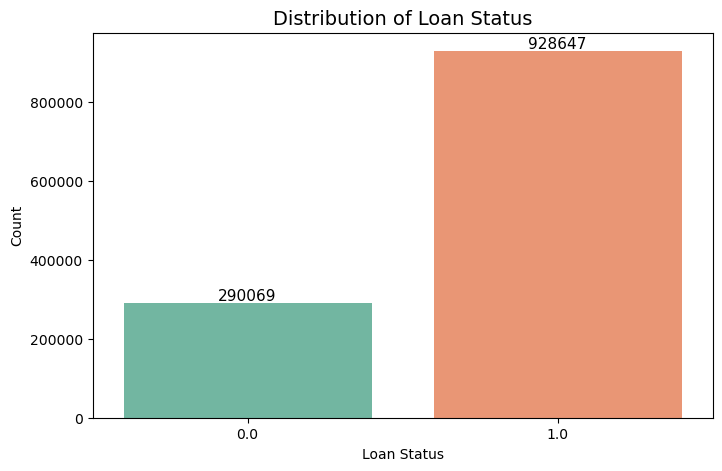

In [118]:
# Set a custom color palette
colors = sns.color_palette("Set2", df['loan_status_new'].nunique())

plt.figure(figsize=(8,5))
ax = sns.countplot(x='loan_status_new', data=df, palette=colors)

# Add data labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=11)

plt.title('Distribution of Loan Status', fontsize=14)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

#### Proportion / Mean of Target by Category
Useful if target loan_status_new is numeric or binary, you can compute the mean target value per category:

In [129]:
# cat_cols = df.select_dtypes(include='category').columns

# for col in cat_cols:
#     prop_df = df.groupby(col)['loan_status_new'].mean().sort_values(ascending=False)
    
#     plt.figure(figsize=(8,4))
#     sns.barplot(x=prop_df.index, y=prop_df.values, palette='Set2')
#     plt.xticks(rotation=45)
#     plt.ylabel('Average Loan Status')
#     plt.title(f'Average Loan Status by {col}')
    
#     # Add data labels
#     for i, v in enumerate(prop_df.values):
#         plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontsize=10)
    
#     plt.show()


 #### Count / Stacked Bar by Target

 Since our 'loan_status_new' column is a Categorical variable:

0 = defaulted or Likely to Default

1 = Fully Paid

we plot counts per category split by target:

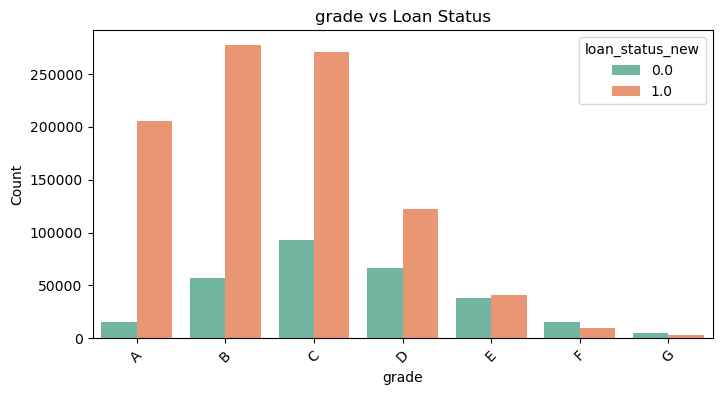

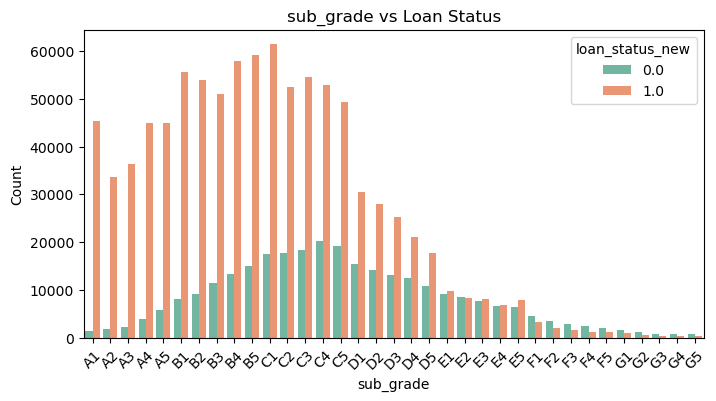

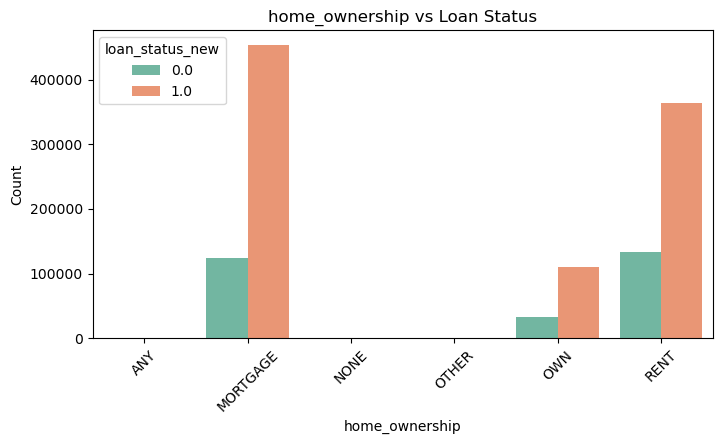

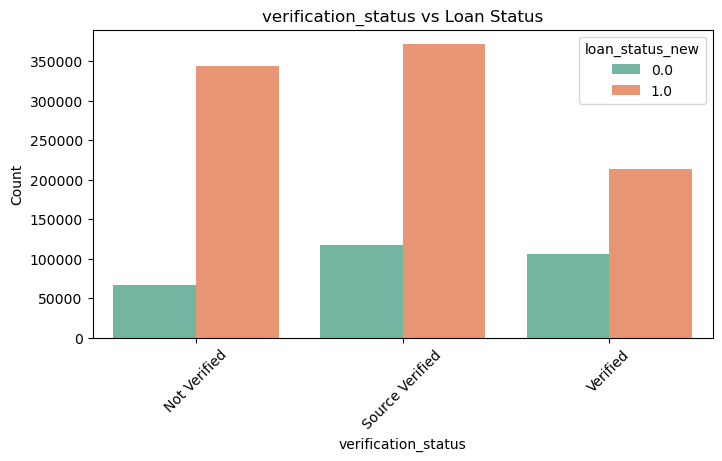

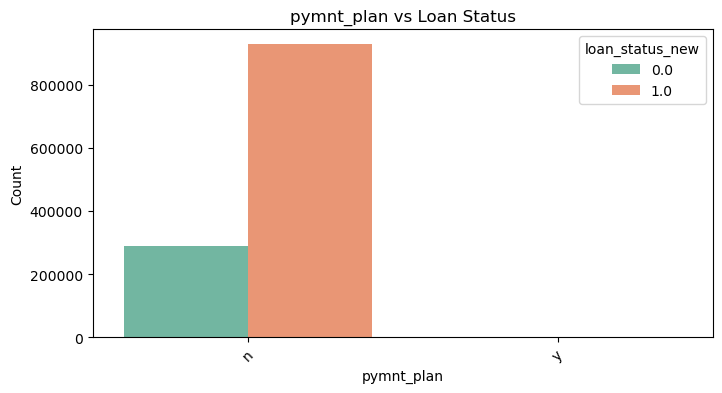

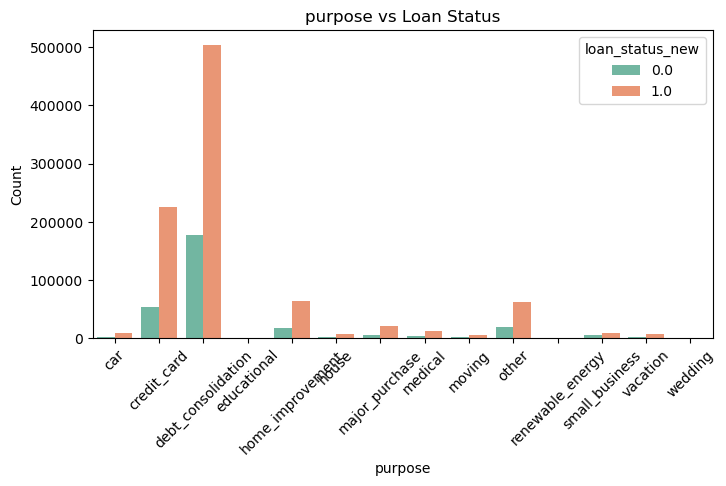

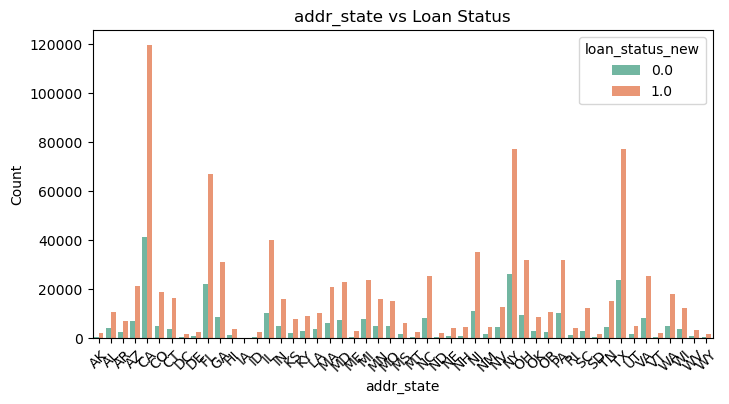

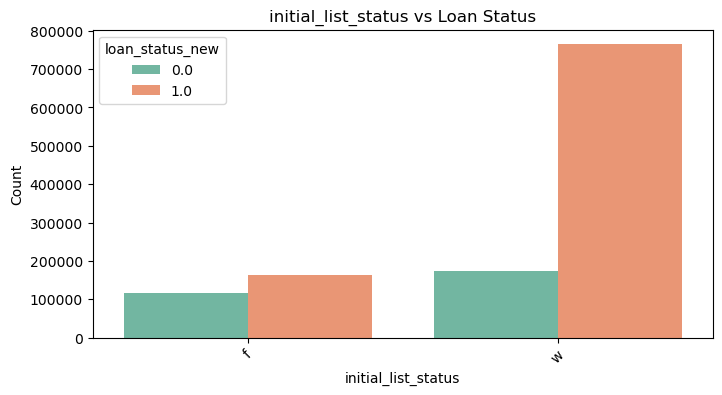

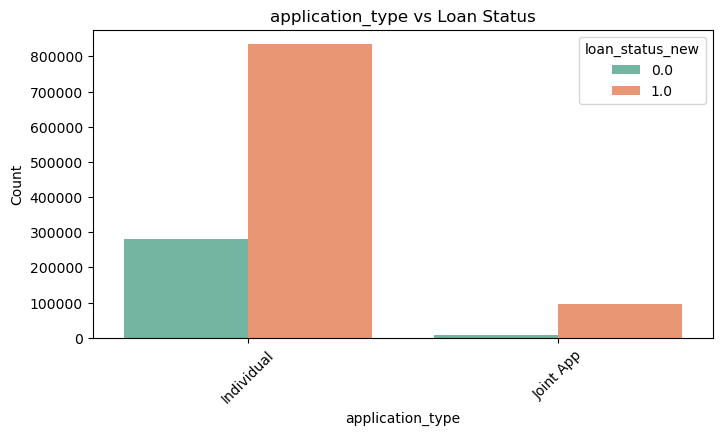

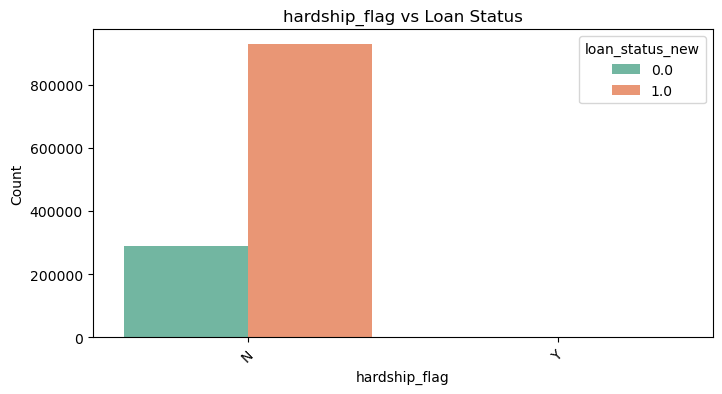

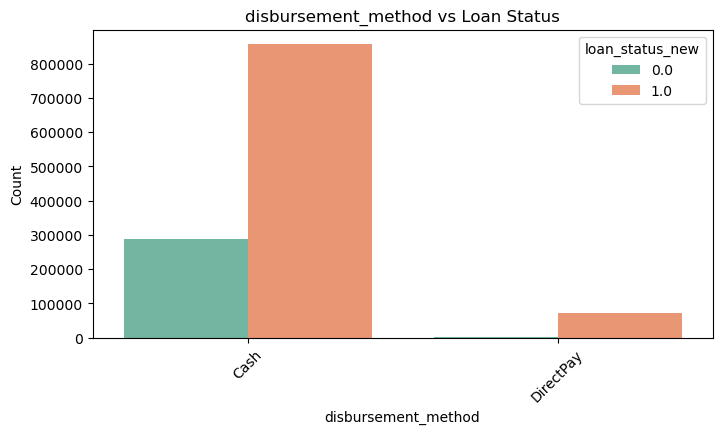

In [130]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='loan_status_new', data=df, palette='Set2')
    plt.xticks(rotation=45)
    plt.title(f'{col} vs Loan Status')
    plt.ylabel('Count')
    plt.show()

### 2️⃣ Numeric Features EDA
For continuous variables (float32 / float64 / int32):

We currently have about 95+ numerical columns so we need to only check the top correlated features with the target.

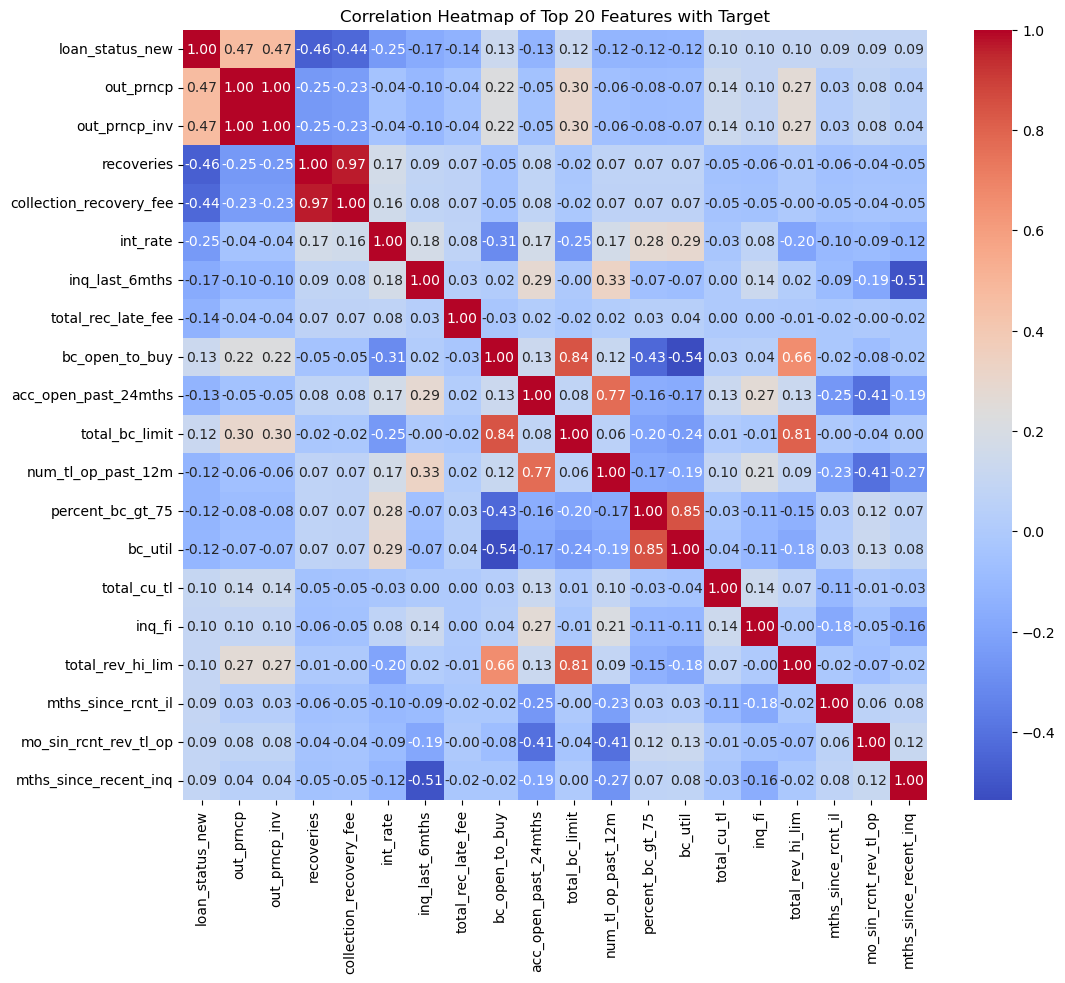

In [125]:
# Include target for correlation calculation
num_cols = df.select_dtypes(include=['float32','float64','int32','int64']).columns

# Compute correlation
corr = df[num_cols].corr()

# Get top 20 features most correlated with target
top_corr = corr['loan_status_new'].abs().sort_values(ascending=False).head(20).index

# Plot heatmap of top correlated features
plt.figure(figsize=(12,10))
sns.heatmap(df[top_corr].corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Top 20 Features with Target')
plt.show()


### 3️⃣ Categorical Features EDA
For categorical / object / category columns:

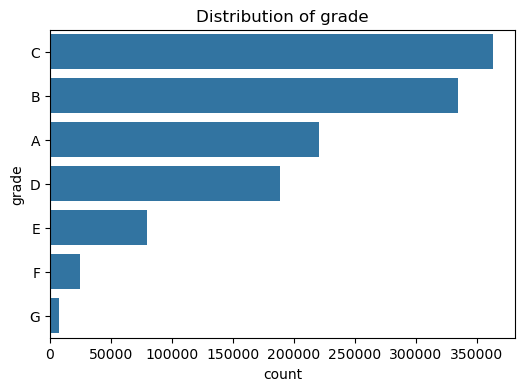

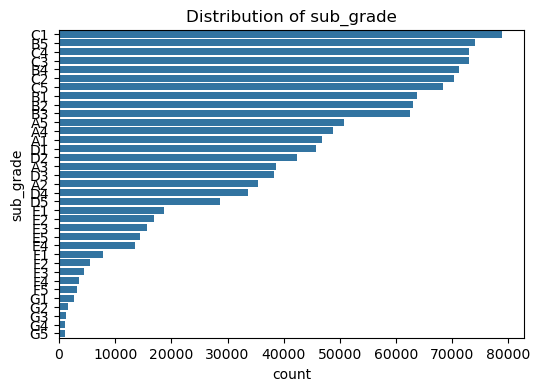

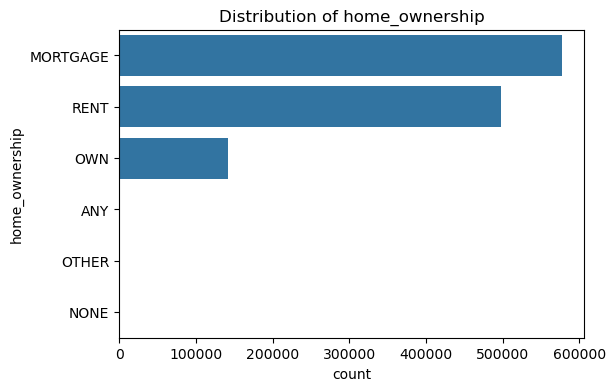

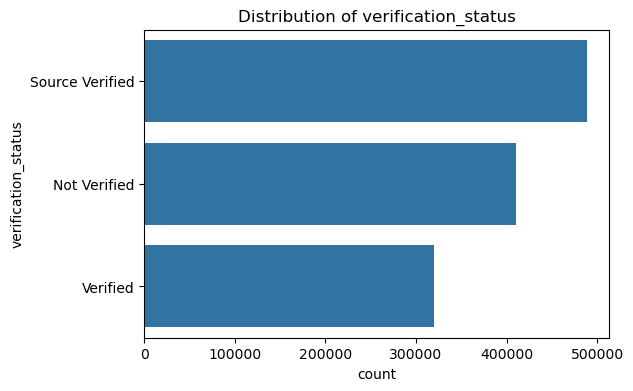

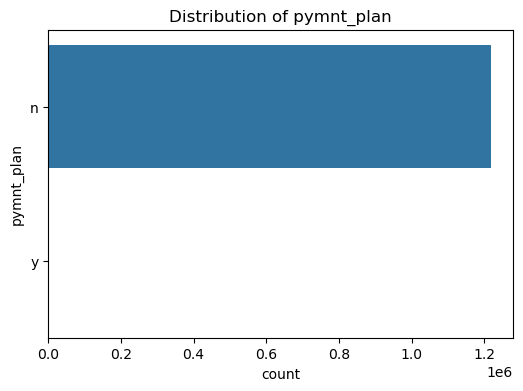

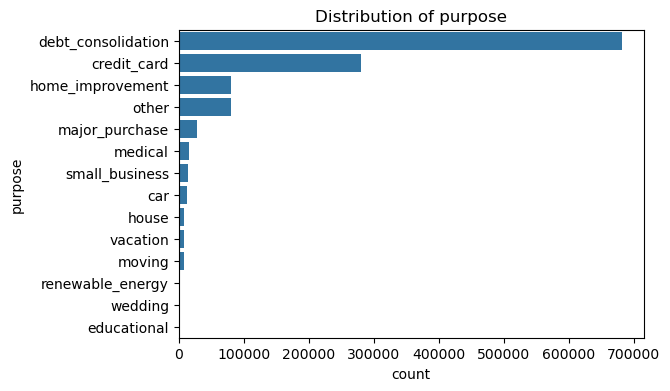

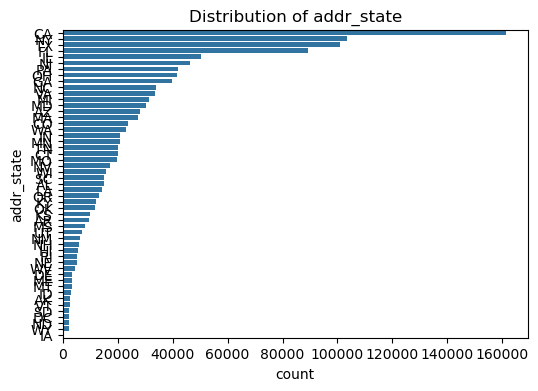

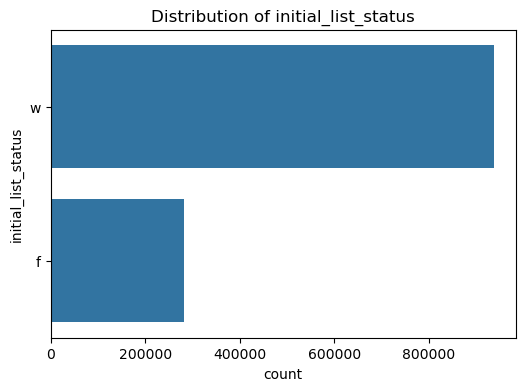

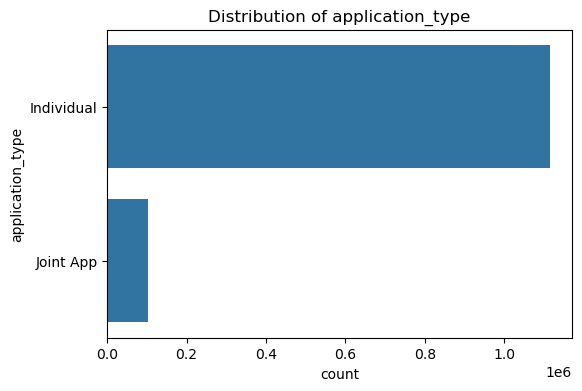

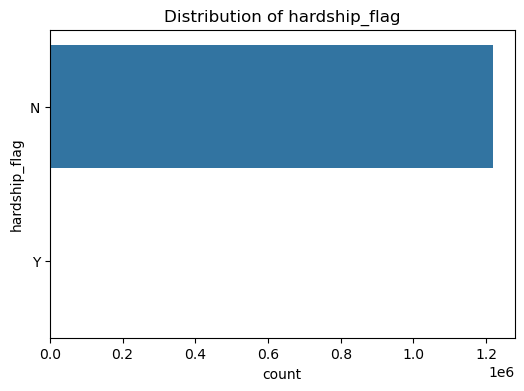

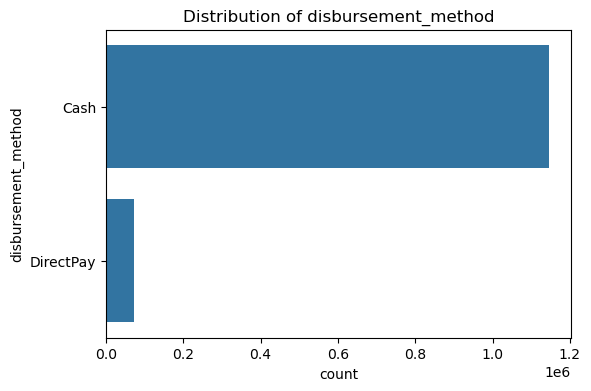

In [126]:
cat_cols = df.select_dtypes(include='category').columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

### 4️⃣ Date Features EDA
For datetime64 columns:

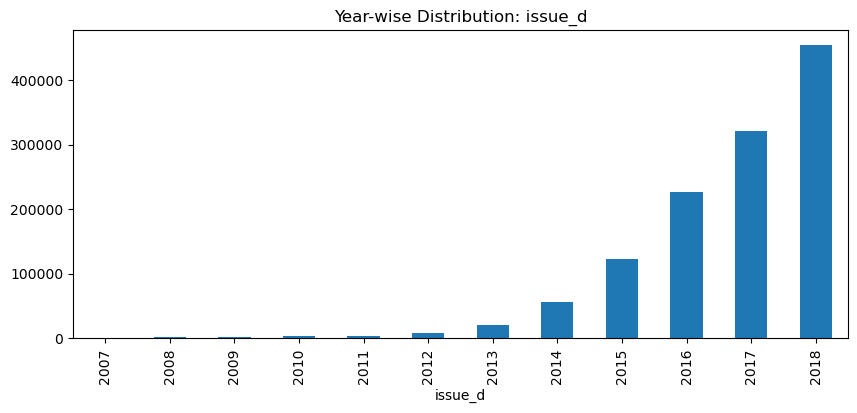

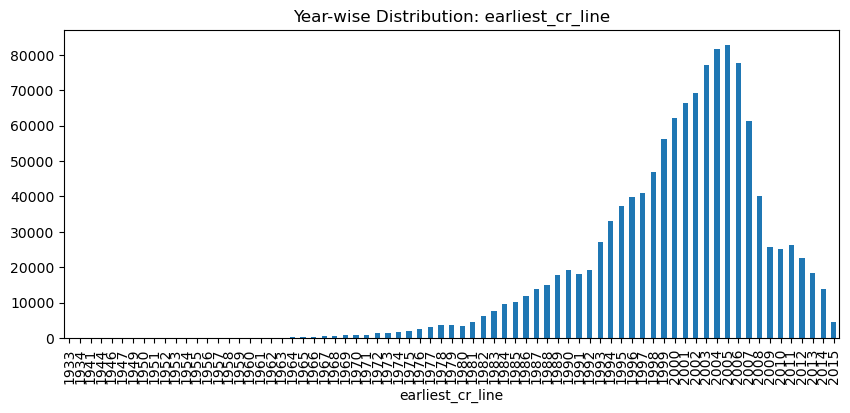

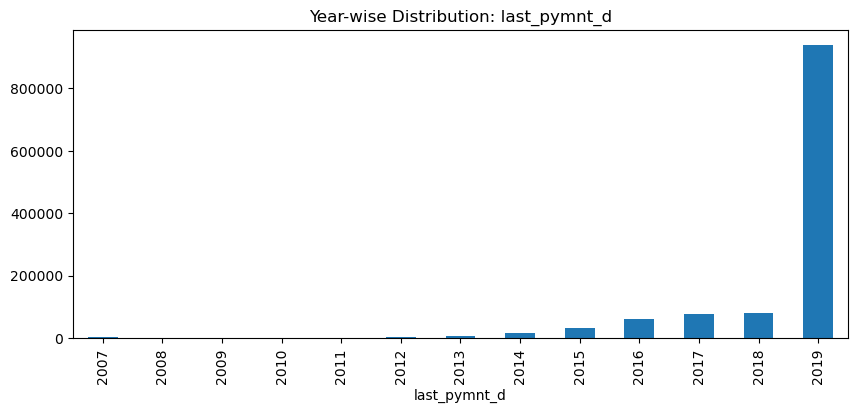

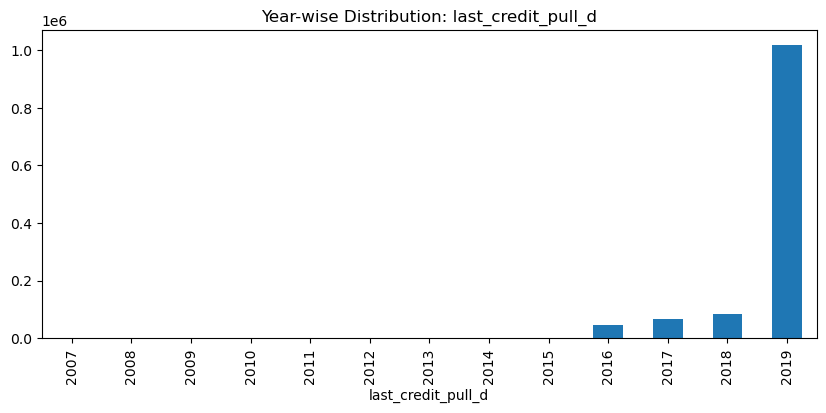

In [133]:
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

for col in date_cols:
    plt.figure(figsize=(10,4))
    df[col].dt.year.value_counts().sort_index().plot(kind='bar')
    plt.title(f'Year-wise Distribution: {col}')
    plt.show()

### 5️⃣ Feature-Target Relationship
Check how numeric and categorical features relate to loan_status_new:

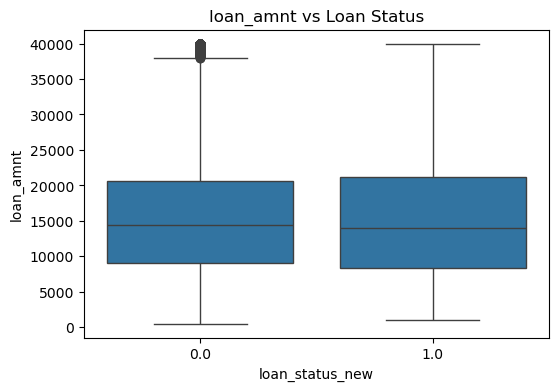

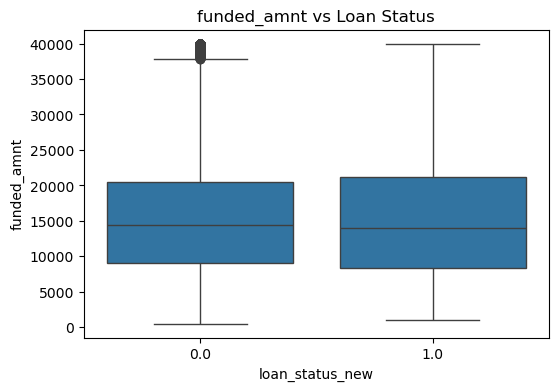

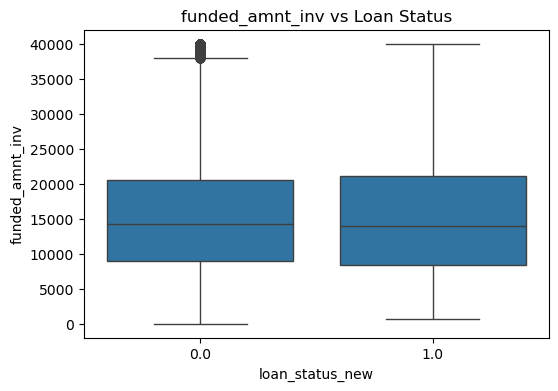

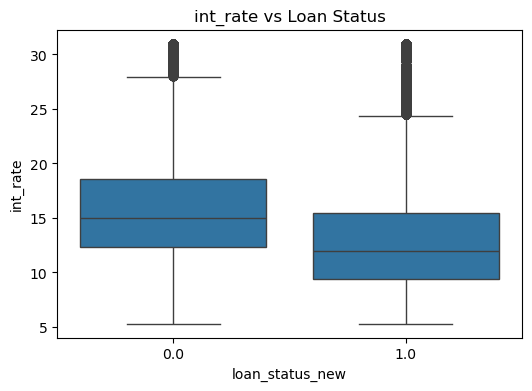

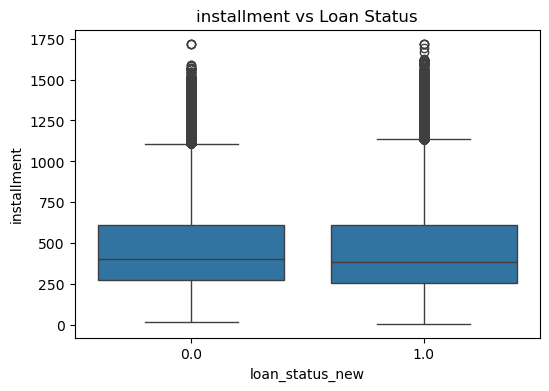

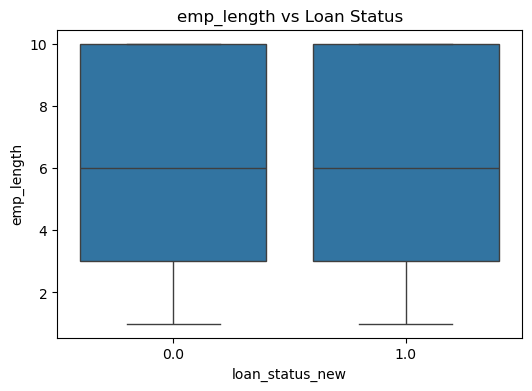

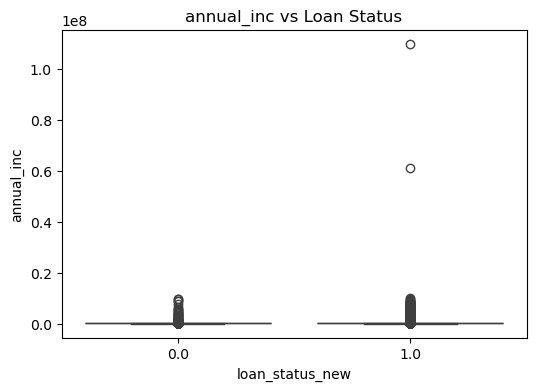

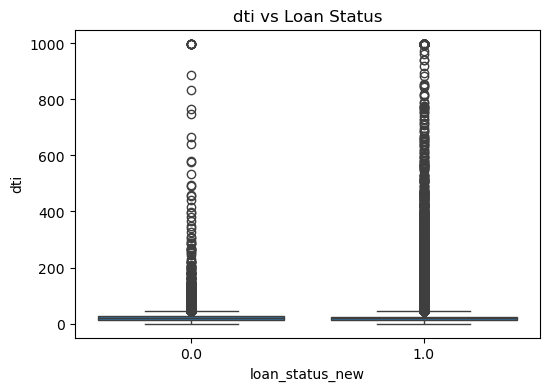

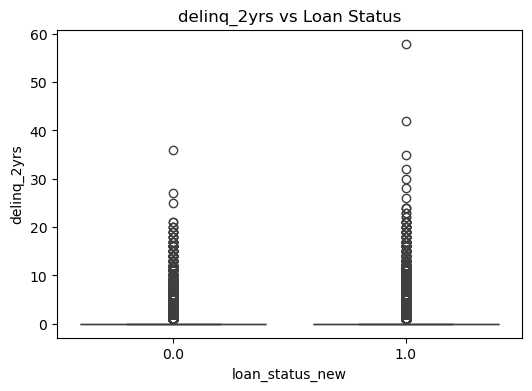

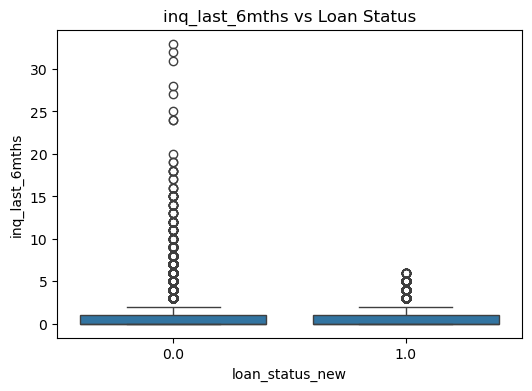

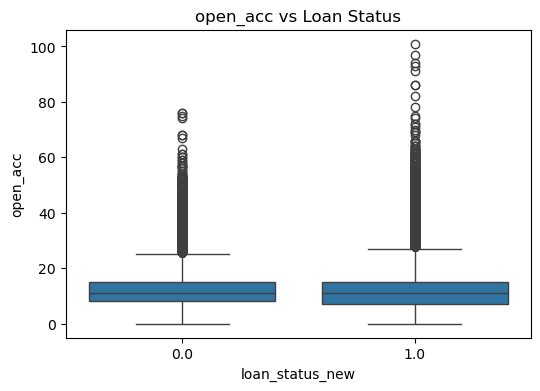

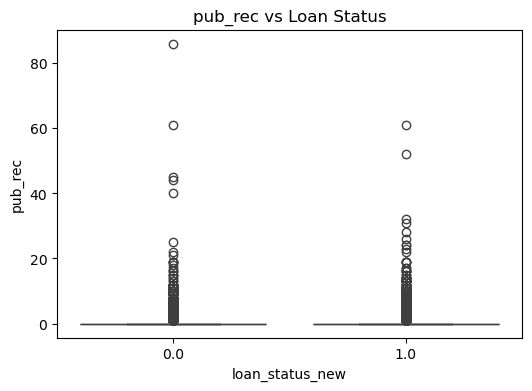

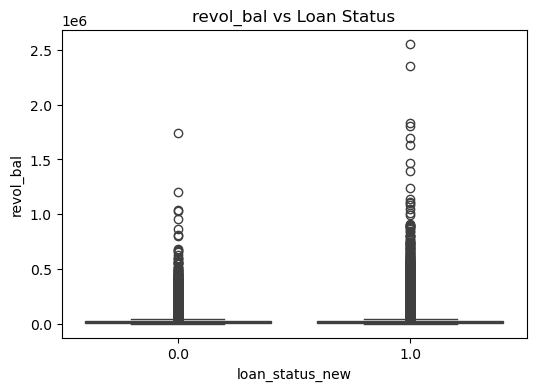

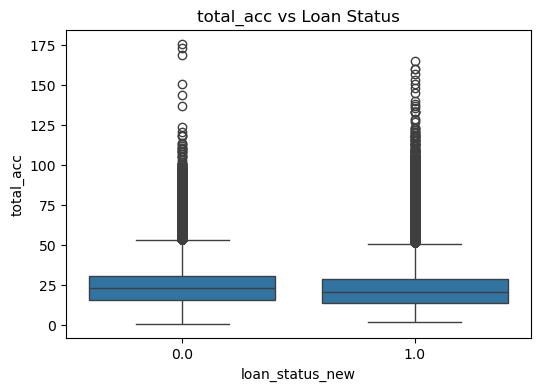

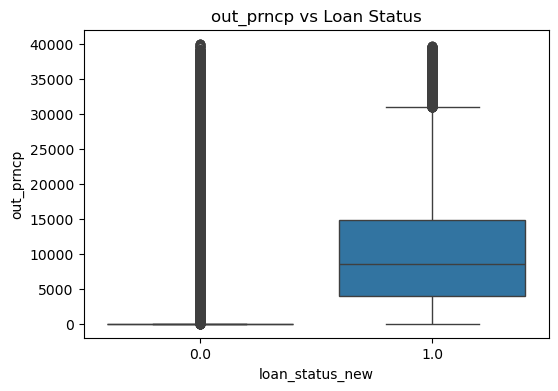

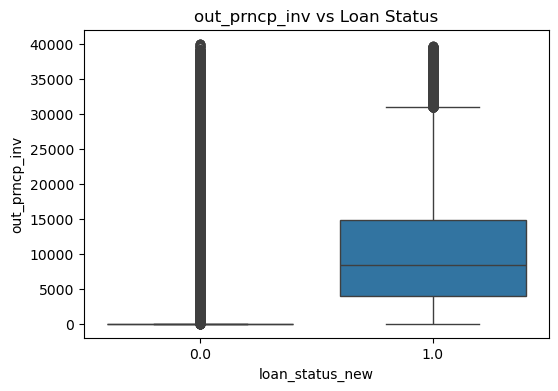

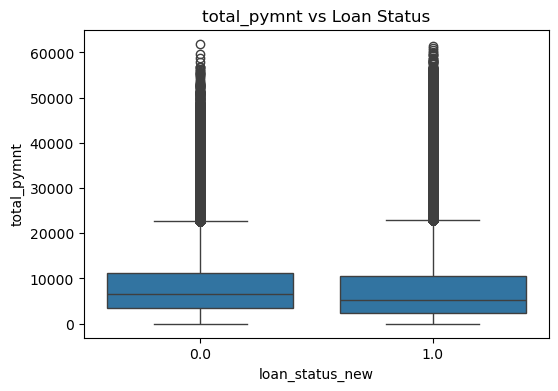

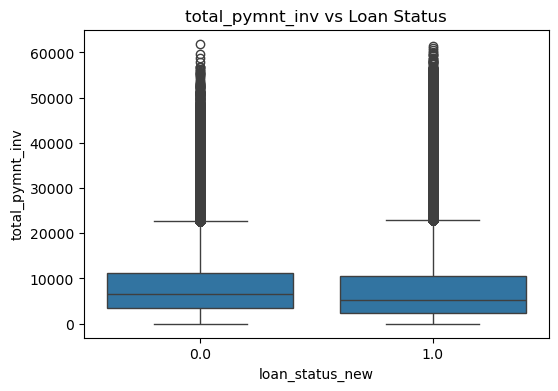

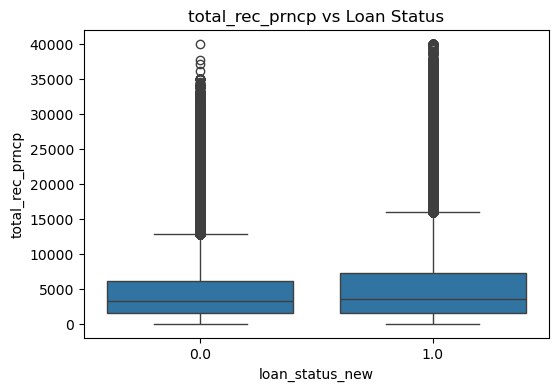

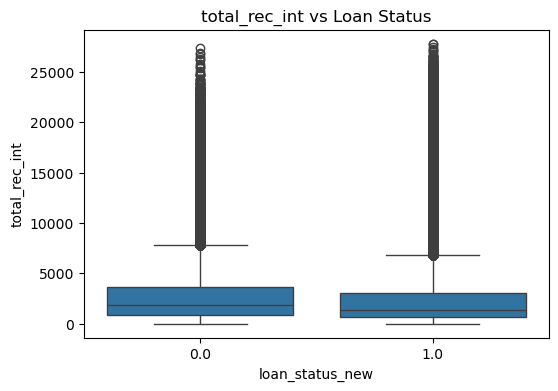

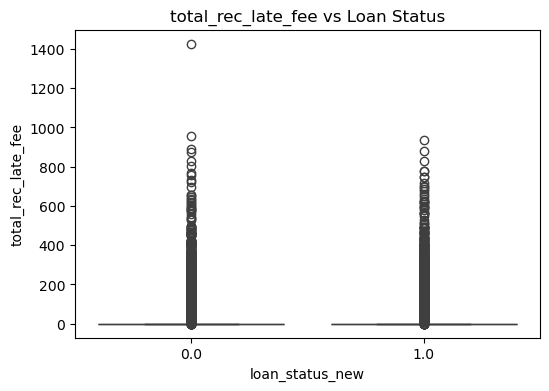

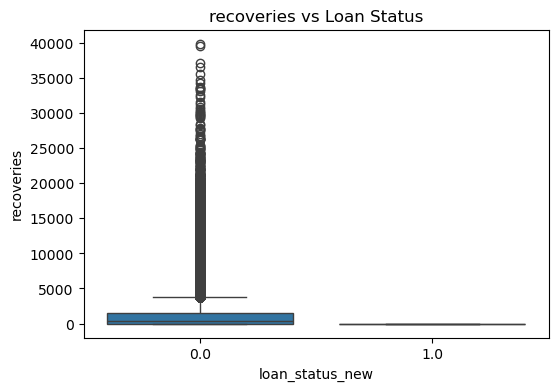

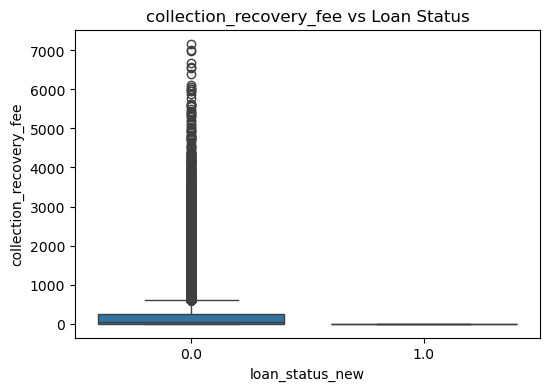

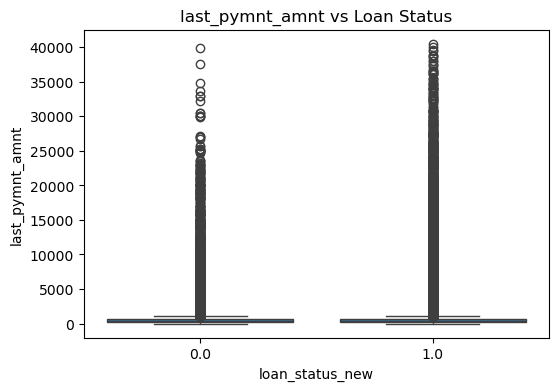

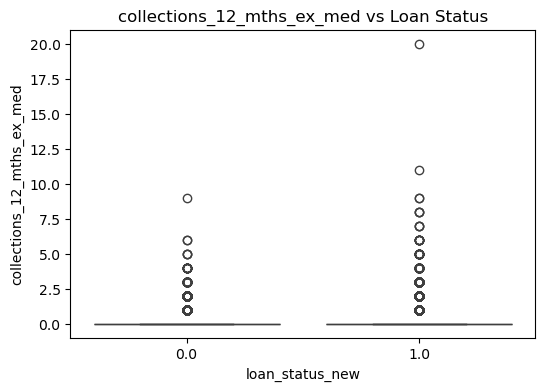

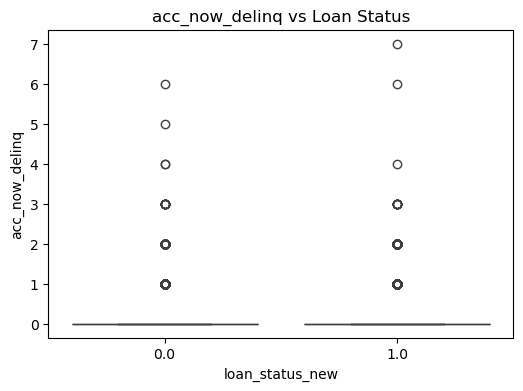

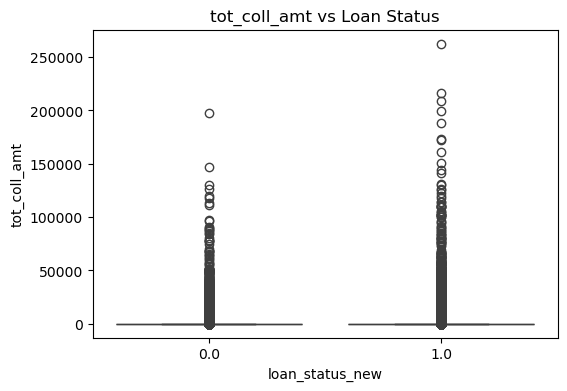

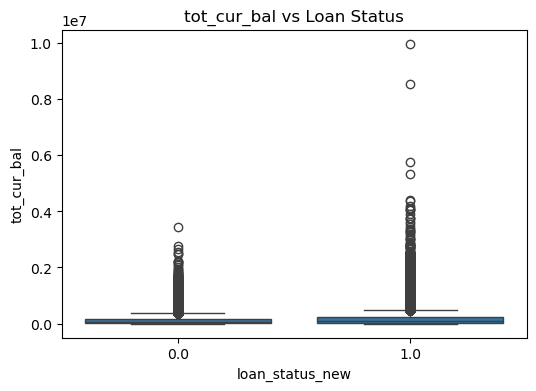

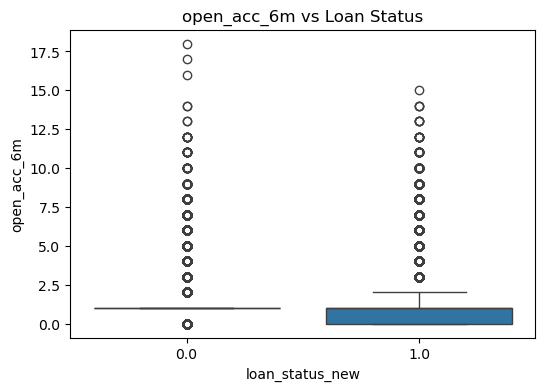

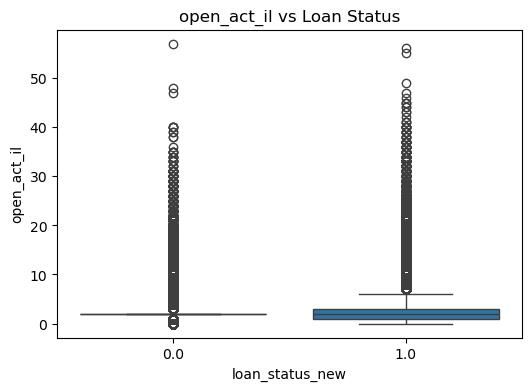

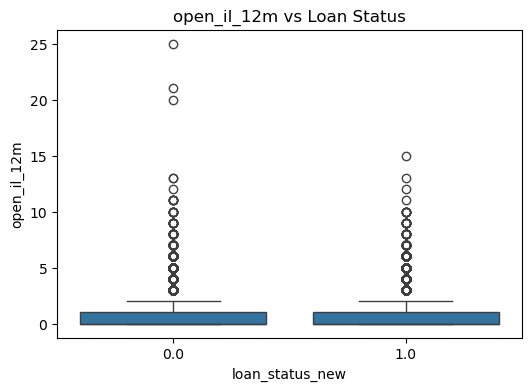

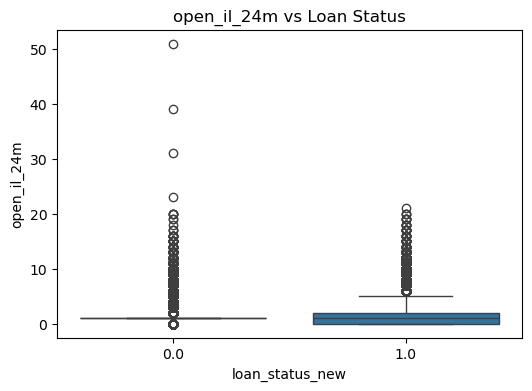

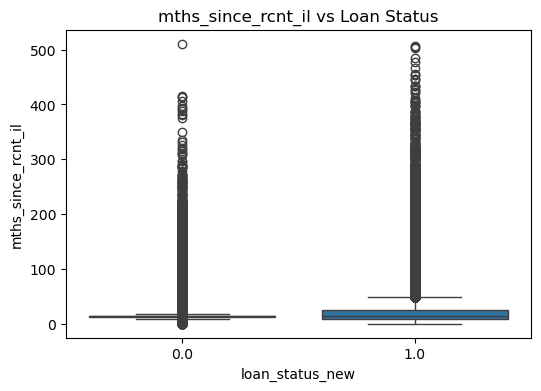

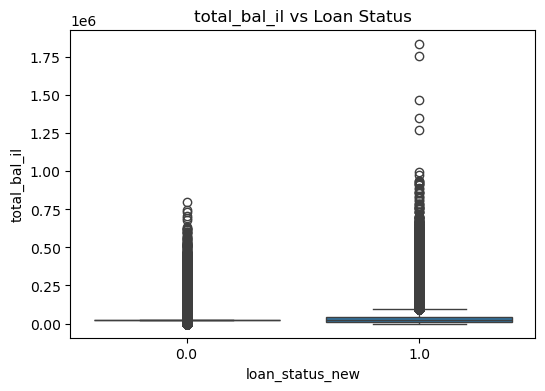

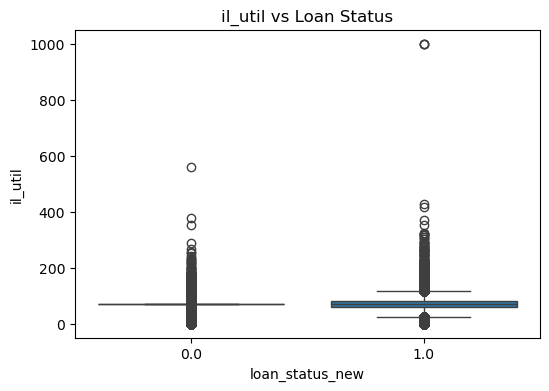

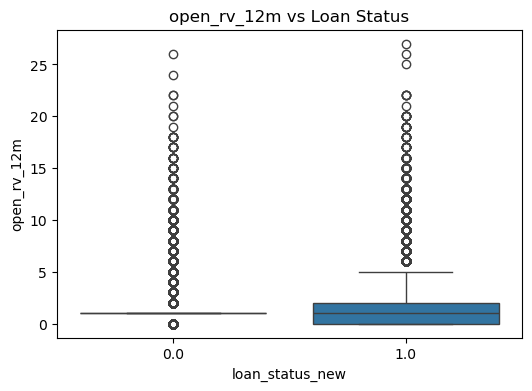

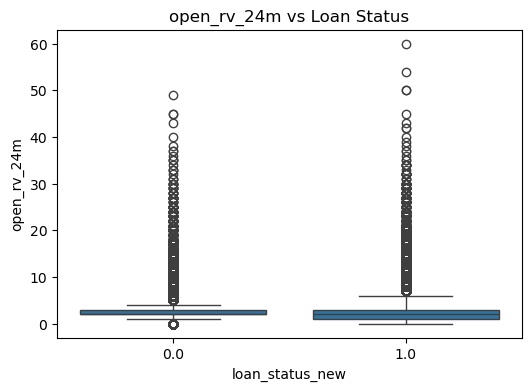

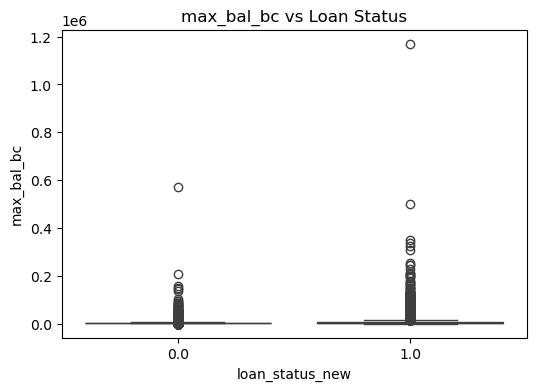

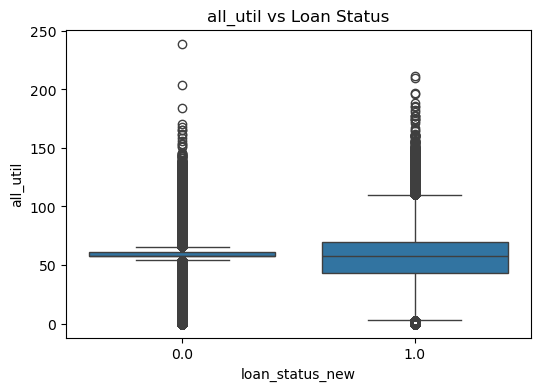

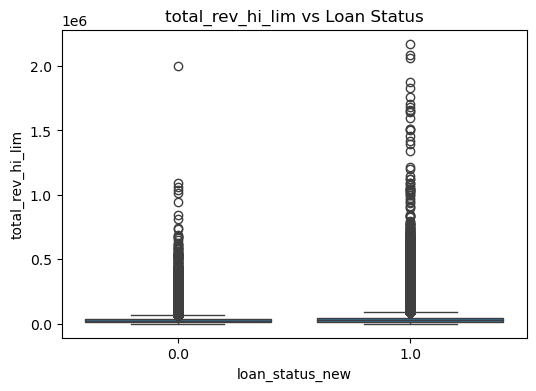

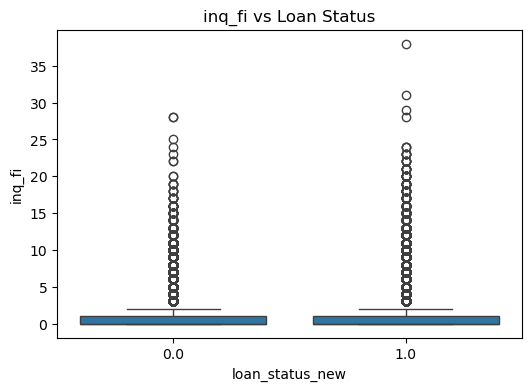

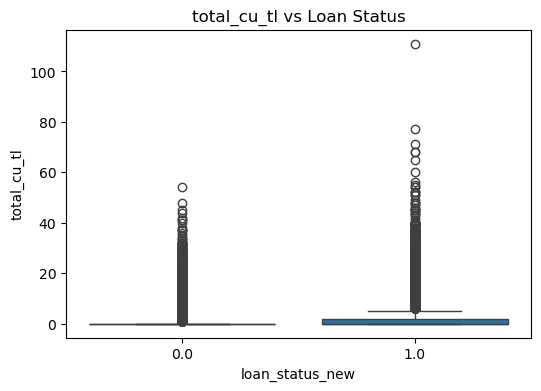

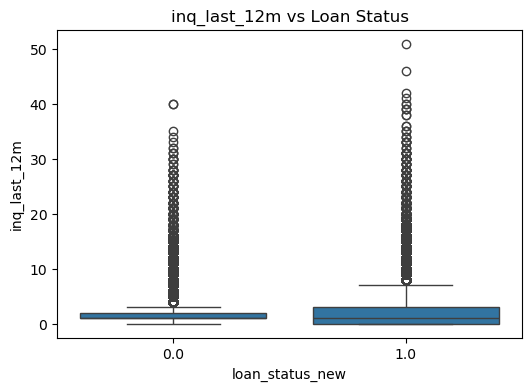

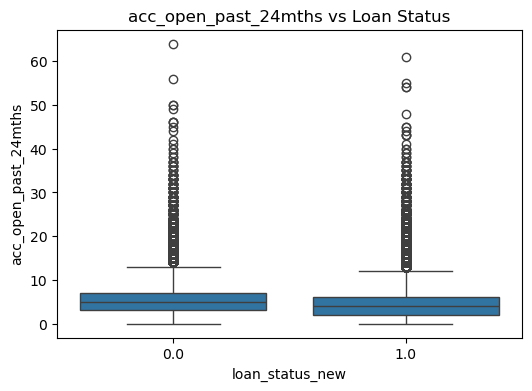

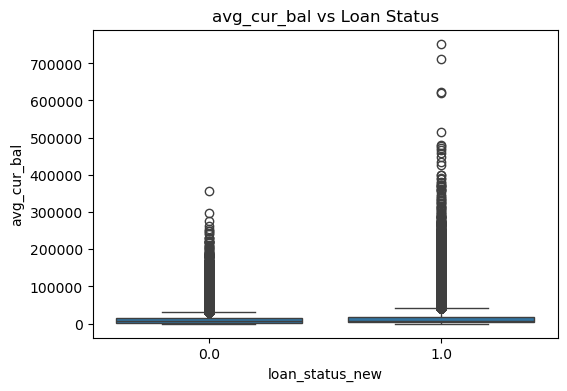

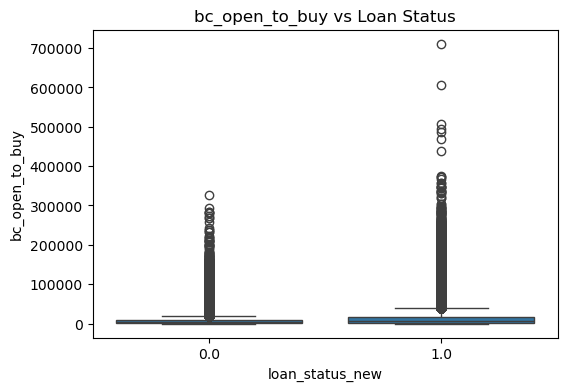

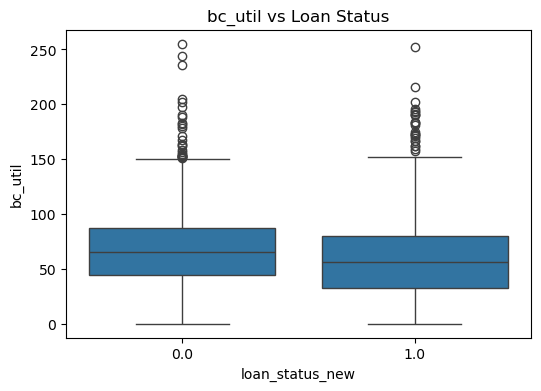

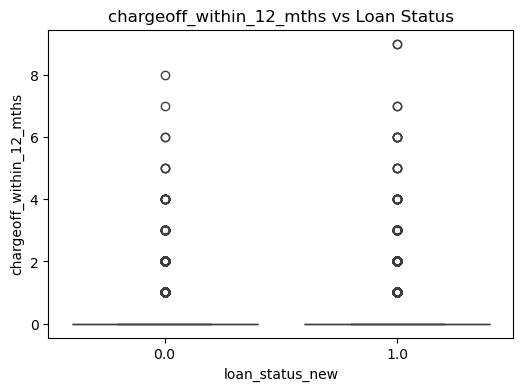

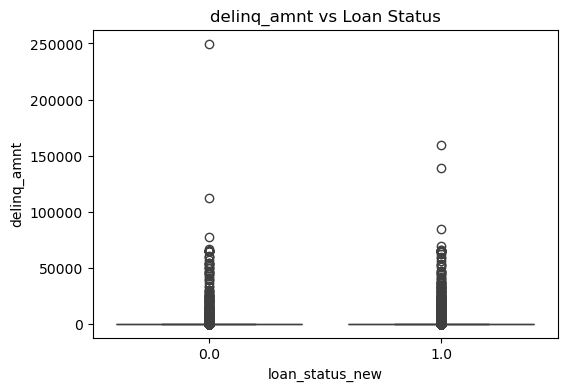

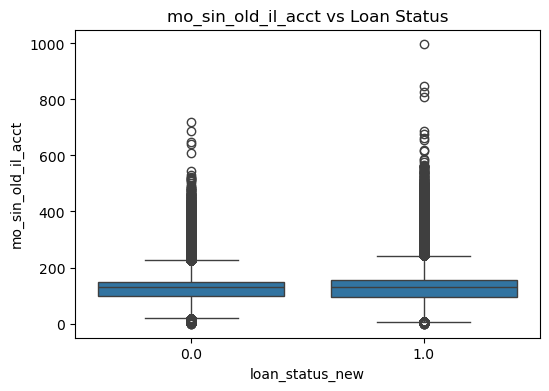

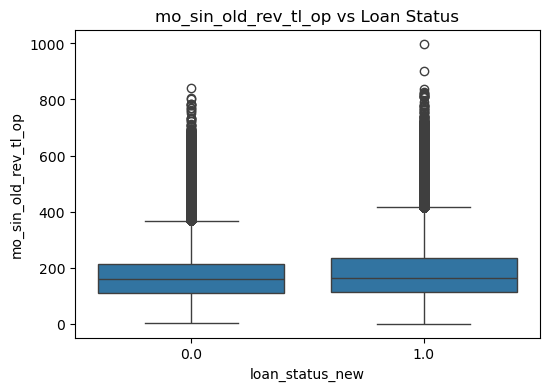

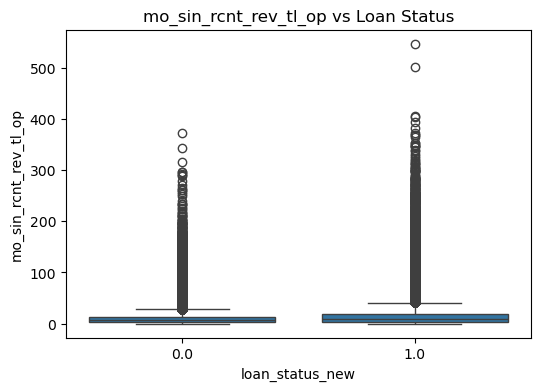

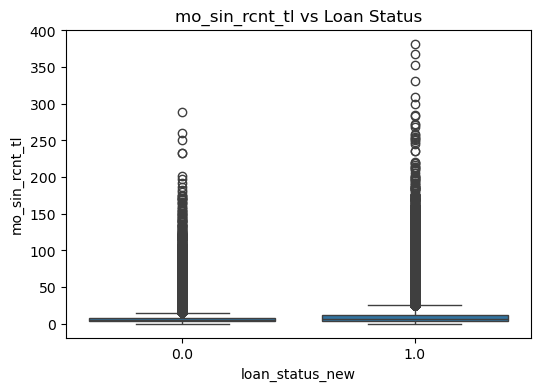

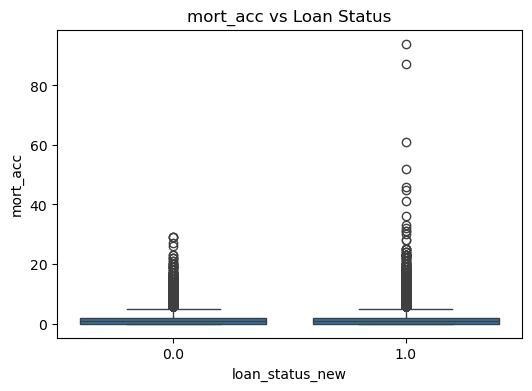

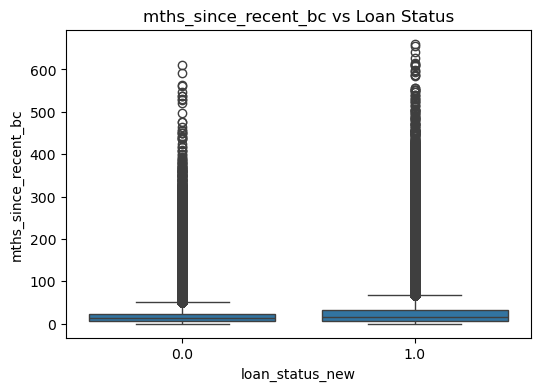

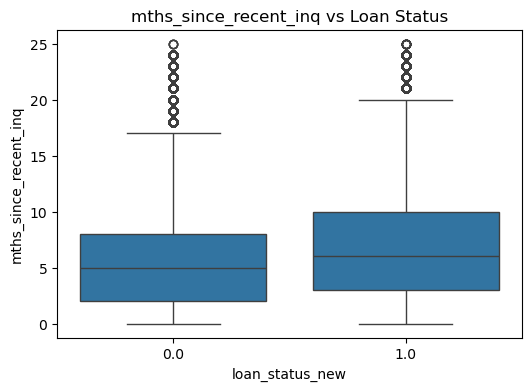

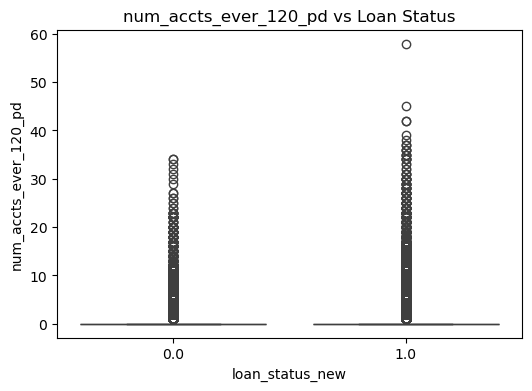

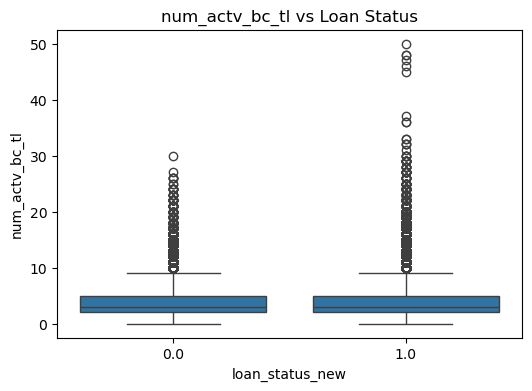

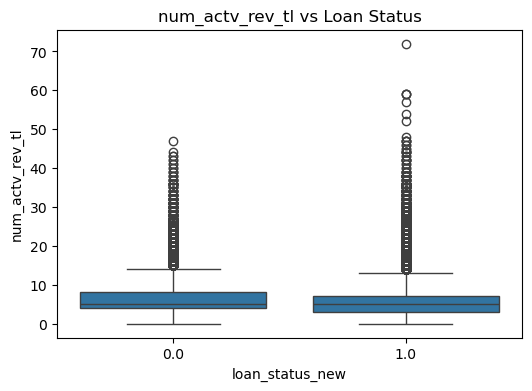

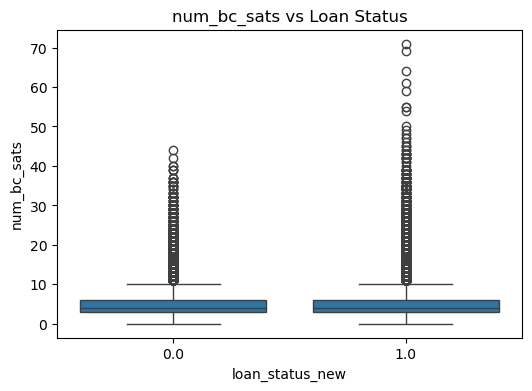

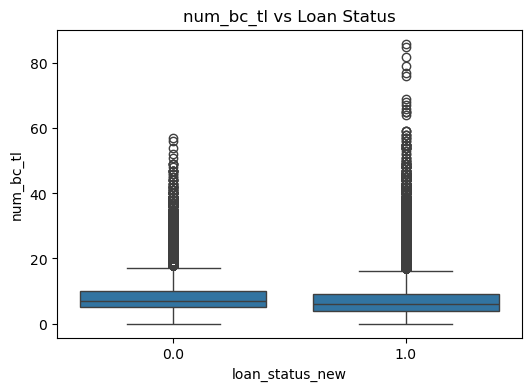

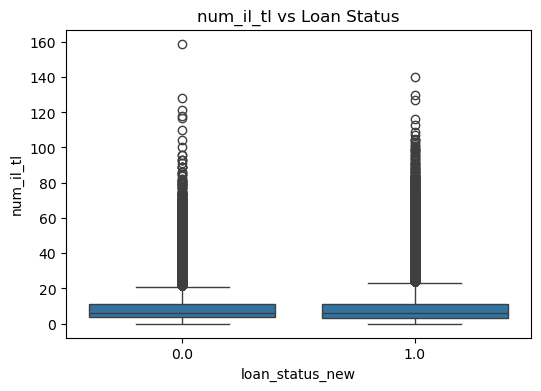

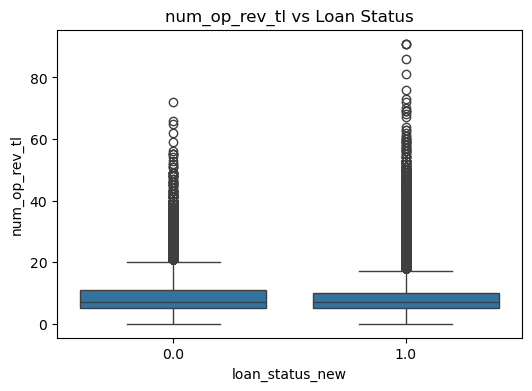

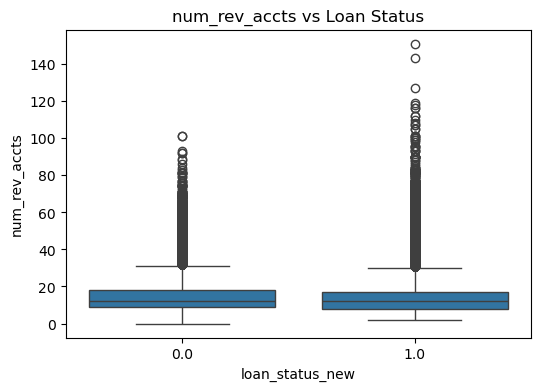

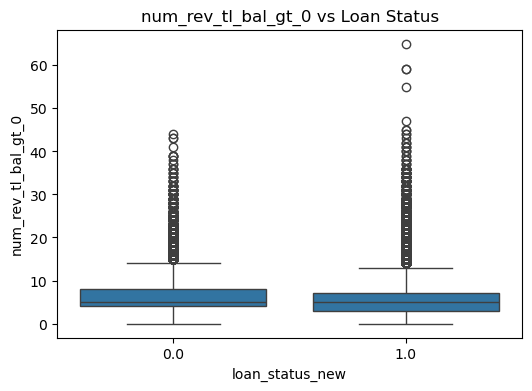

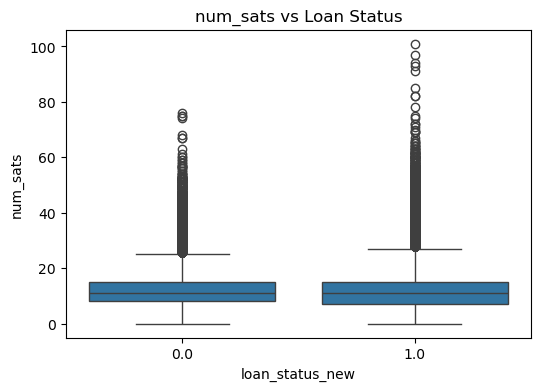

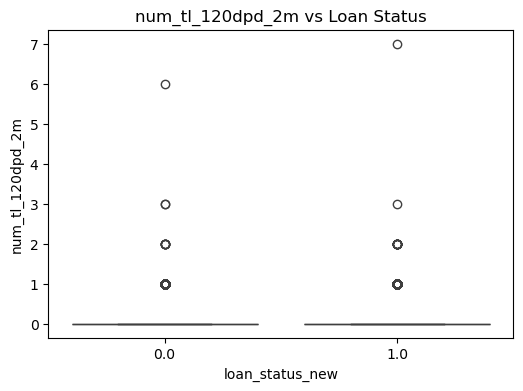

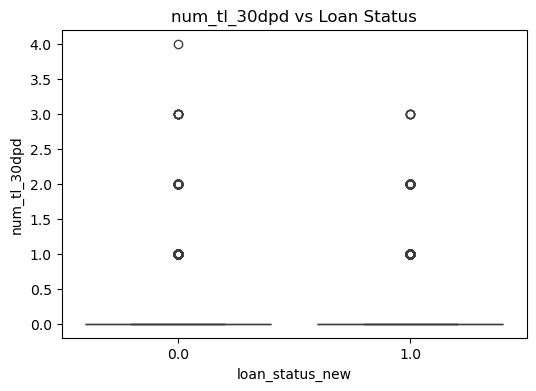

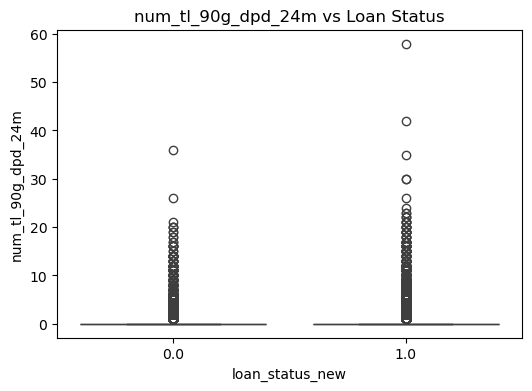

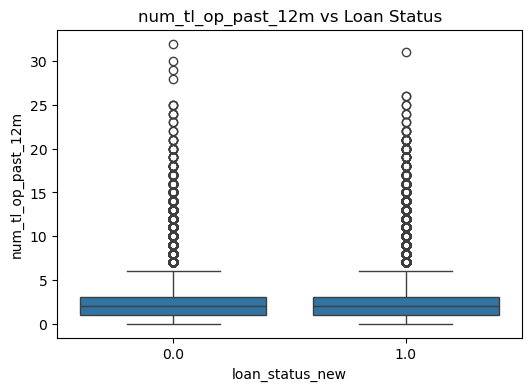

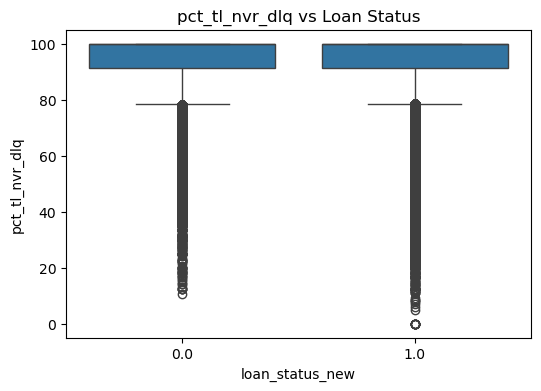

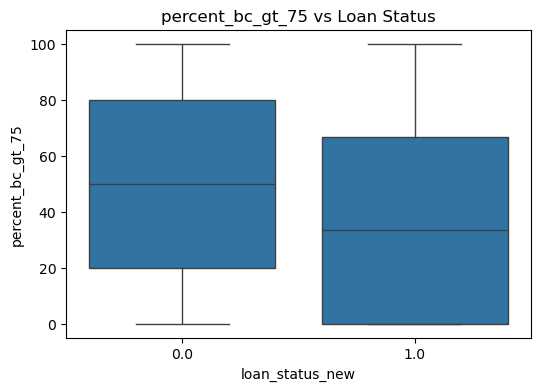

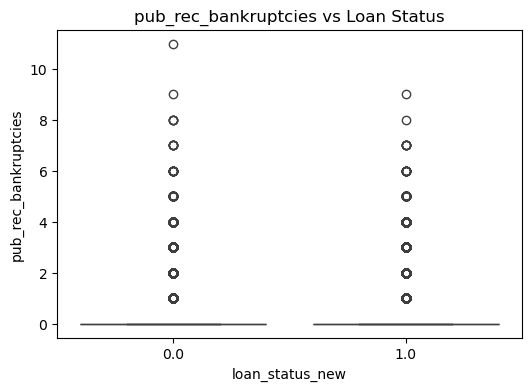

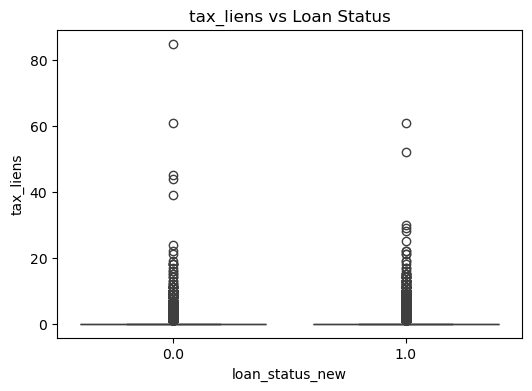

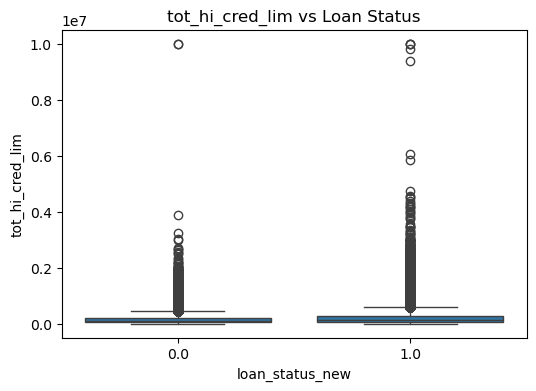

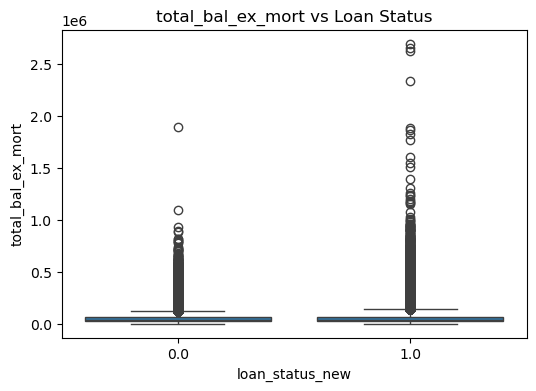

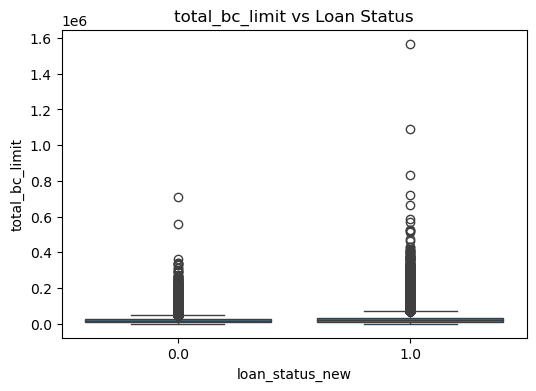

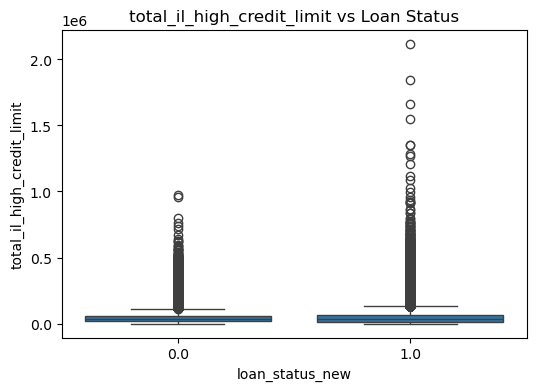

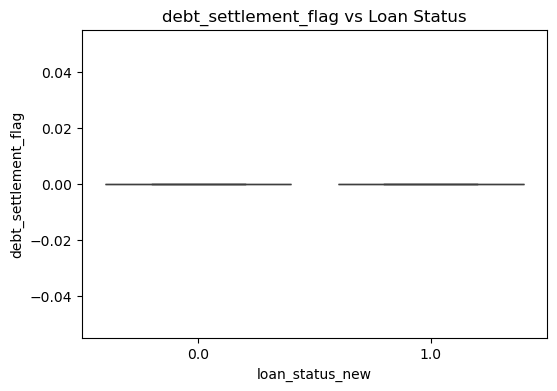

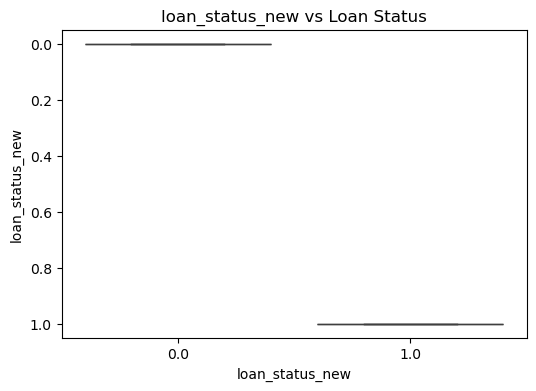

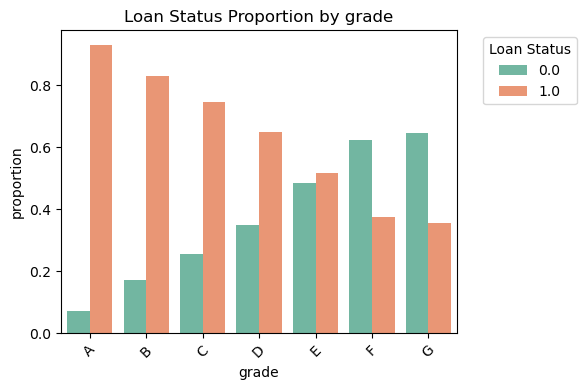

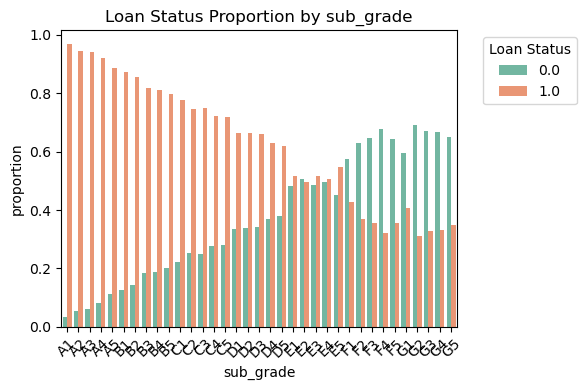

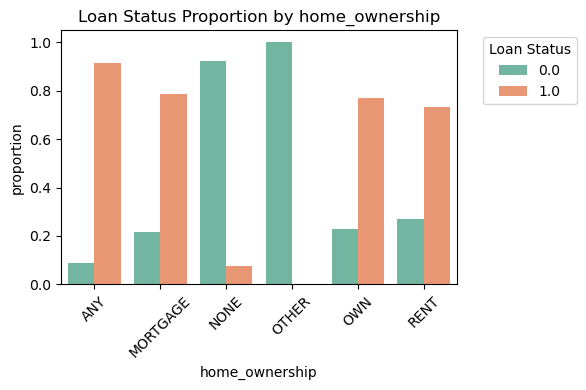

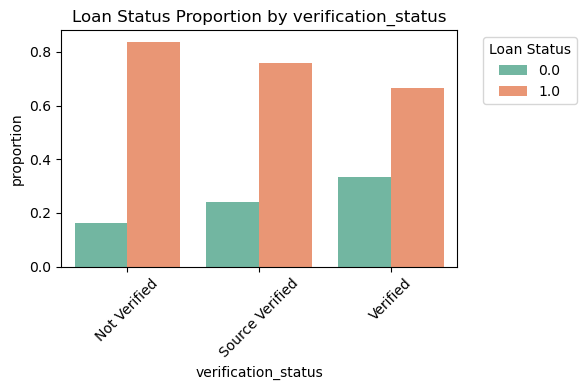

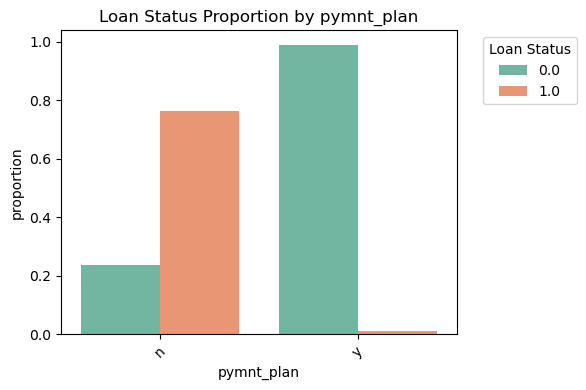

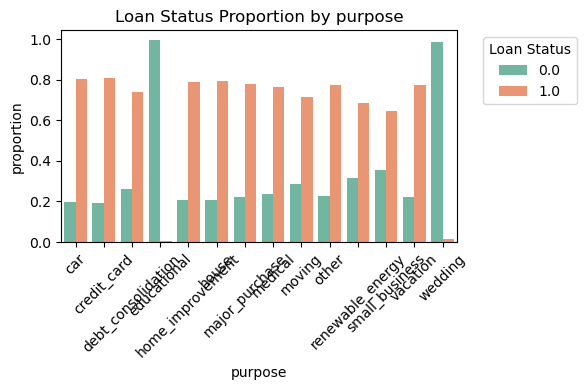

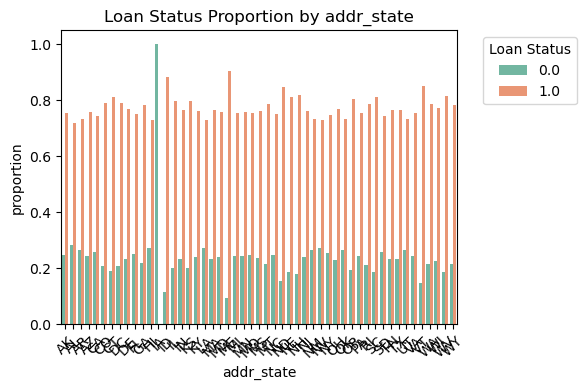

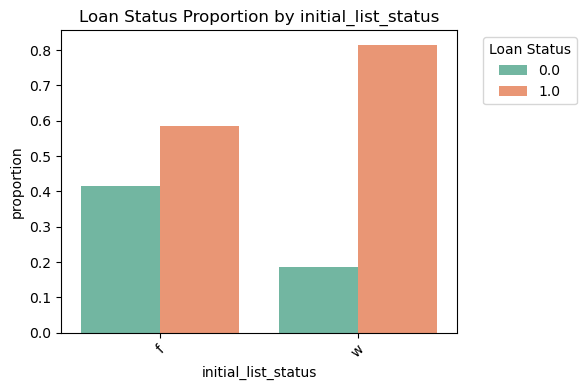

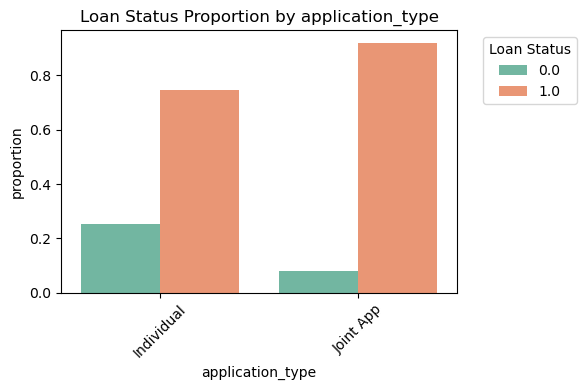

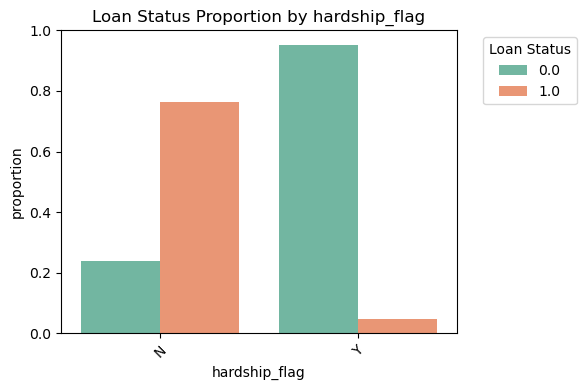

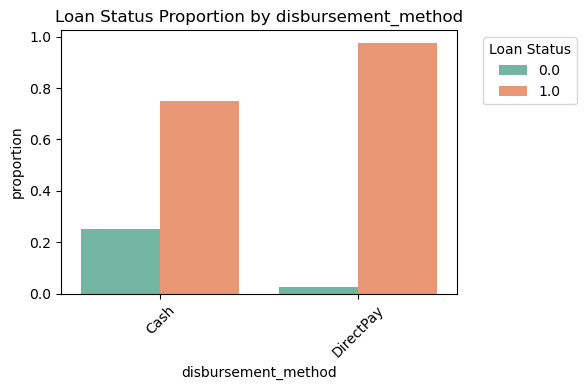

In [136]:
# Numeric features vs target


# Numeric features vs categorical target
for col in num_cols:
    try:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='loan_status_new', y=col, data=df)
        plt.title(f'{col} vs Loan Status')
        plt.show()
    except Exception as e:
        print(f"Skipped numeric column {col}: {e}")

# Categorical features vs categorical target (proportion)
for col in cat_cols:
    try:
        plt.figure(figsize=(6, 4))
        prop_df = (
            df.groupby(col)['loan_status_new']
              .value_counts(normalize=True)
              .rename('proportion')
              .reset_index()
        )
        sns.barplot(
            x=col, y='proportion', hue='loan_status_new',
            data=prop_df, palette='Set2'
        )
        plt.xticks(rotation=45)
        plt.title(f'Loan Status Proportion by {col}')
        plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Skipped categorical column {col}: {e}")



### 6️⃣ Target Balance Check
Checking if we have a class imbalance due in preparation for Machine Learning

In [137]:
df['loan_status_new'].value_counts(normalize=True)

loan_status_new
1.0    0.761988
0.0    0.238012
Name: proportion, dtype: float64

### Save dataframe into an excel

In [140]:
df.to_csv("Cleaned_df.csv", index=False)